# Understanding Airbnb activity in Rio de Janeiro, Brazil

This project demonstrate the analysis of Rio de Janeiro Airbnb data using CRISP-DM process.

CRISP-DM which stands for Cross-Industry Standard Process for Data Mining is an industry standard.


### About Data

Data being used in this notebook can be found [here](http://insideairbnb.com/get-the-data/), where files pertinent to current analysis include:

* listings: which is summary information of the detailed listings
* detailed_listings: comprehensive information about listings in Rio
* calendar: includes the calendar data for the above listings


### Questions of Interest



1) What is the most expensive month to visit Rio de Janeiro?
---

2) Most and least expensive Neighbourhood in Rio de Janeiro?
---


3) What are the factors associated with price of listings?
---

## Basic Information of Data

This section consist of some basic understanding of each dataset

In [1]:
# importing necessary libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# read in listings data

listings = pd.read_csv('Rio/listings.csv')

In [3]:
# a look into the dataframe

listings.head()

id                                               name  host_id  \
0   17878  Condo in Rio de Janeiro · ★4.70 · 2 bedrooms ·...    68997   
1  216461  Rental unit in Rio de Janeiro · 1 bedroom · 1 ...  1154263   
2  326205  Condo in Rio de Janeiro · ★4.57 · 1 bedroom · ...  1603206   
3   25026  Rental unit in Rio de Janeiro · ★4.72 · 1 bedr...   102840   
4  326575  Rental unit in Rio de Janeiro · ★4.81 · 2 bedr...  1668565   

     host_name  neighbourhood_group neighbourhood  latitude  longitude  \
0     Matthias                  NaN    Copacabana -22.96599  -43.17940   
1  Zeilma , Da                  NaN      Flamengo -22.93990  -43.17676   
2          Bob                  NaN    Copacabana -22.96825  -43.18237   
3      Viviane                  NaN    Copacabana -22.97735  -43.19105   
4   Maria José                  NaN    Copacabana -22.97696  -43.18933   

         room_type   price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt  1357.0               5                311  2023-12-22   
1     Private room   734.0               1                  0         NaN   
2  Entire home/apt   366.0               3                152  2023-11-21   
3  Entire home/apt   865.0               2                275  2023-12-03   
4  Entire home/apt   368.0               4                227  2023-11-21   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               1.90                               1               269   
1                NaN                               1               365   
2               1.07                               5               293   
3               1.67                               1               228   
4               1.58                               1               245   

   number_of_reviews_ltm  license  
0                     29      NaN  
1                      0      NaN  
2                     14      NaN  
3                     29      NaN  
4                     12      NaN

In [4]:
print('Printing Rio de Janeiro listing summary info: ')
print(" ")
listings.info()


Printing Rio de Janeiro listing summary info: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36008 entries, 0 to 36007
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36008 non-null  int64  
 1   name                            36008 non-null  object 
 2   host_id                         36008 non-null  int64  
 3   host_name                       35999 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   36008 non-null  object 
 6   latitude                        36008 non-null  float64
 7   longitude                       36008 non-null  float64
 8   room_type                       36008 non-null  object 
 9   price                           34237 non-null  float64
 10  minimum_nights                  36008 non-null  int64  
 11  number_of_reviews               36008 non-nu

In [5]:
#list of columns with no missing values 

listings.columns[listings.isnull().mean() == 0].tolist()

['id',
 'name',
 'host_id',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm']

In [6]:
#list of columns with 75% of missing values

listings.columns[listings.isnull().mean() > 0.75].tolist()

['neighbourhood_group', 'license']

Entire home/apt    28468
Private room        6910
Shared room          592
Hotel room            38
Name: room_type, dtype: int64


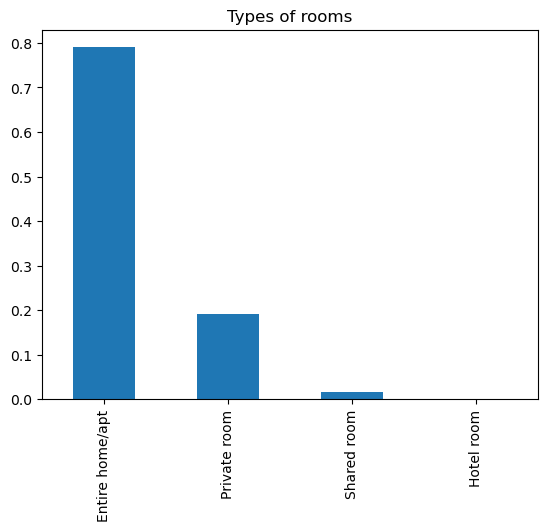

In [7]:
#distribution of room_type column

room_type = listings.room_type.value_counts()
print(room_type)

(room_type/listings.shape[0]).plot(kind = 'bar')
plt.title("Types of rooms");

Total number of neighbourhoods:  156


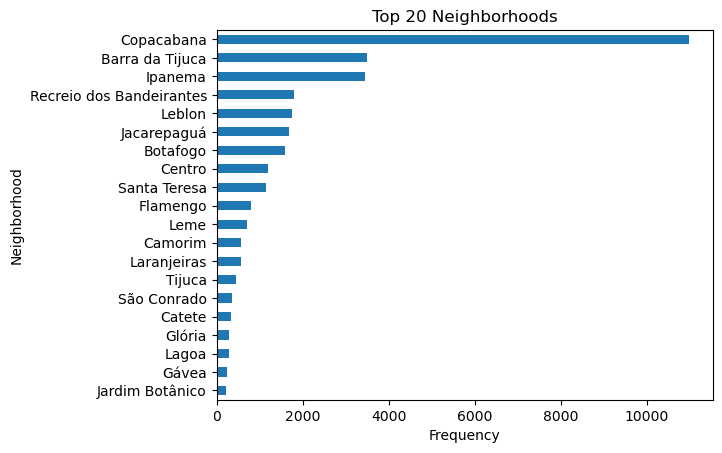

In [8]:
# Grouping neighborhoods by a higher-level category
# Top N neighborhoods
top_n = 20 # You can adjust this value as needed
neighbourhood_counts = listings['neighbourhood'].value_counts()
print('Total number of neighbourhoods: ', len(neighbourhood_counts))

# Plotting
neighbourhood_counts.head(20).plot(kind='barh')
plt.title("Top {} Neighborhoods".format(top_n))
plt.xlabel("Frequency")
plt.ylabel("Neighborhood")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

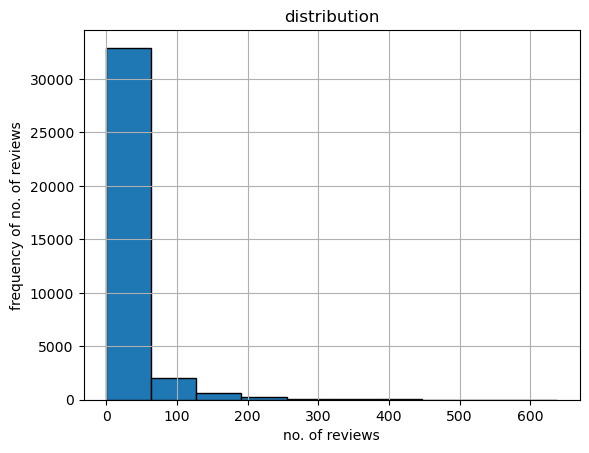

In [9]:
#distribution of num of reviews

listings.number_of_reviews.hist(edgecolor = 'black')
plt.title("distribution")
plt.xlabel("no. of reviews")
plt.ylabel("frequency of no. of reviews");

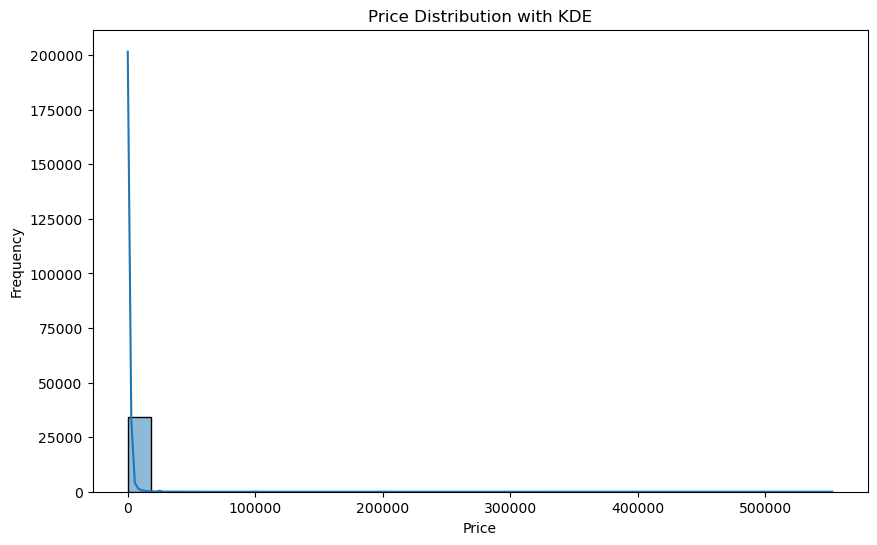

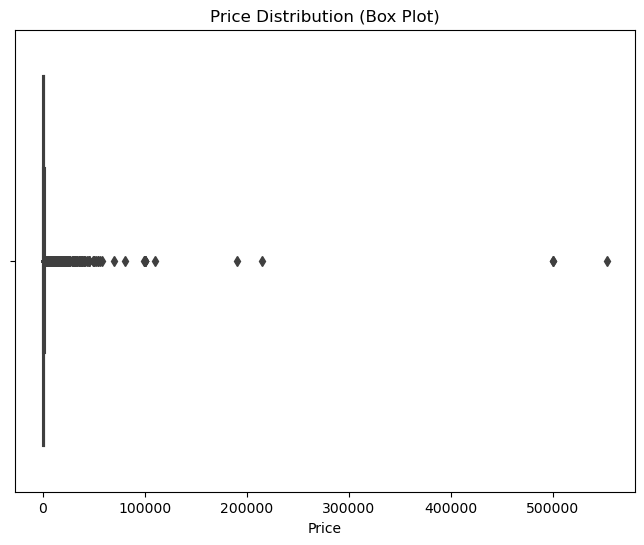

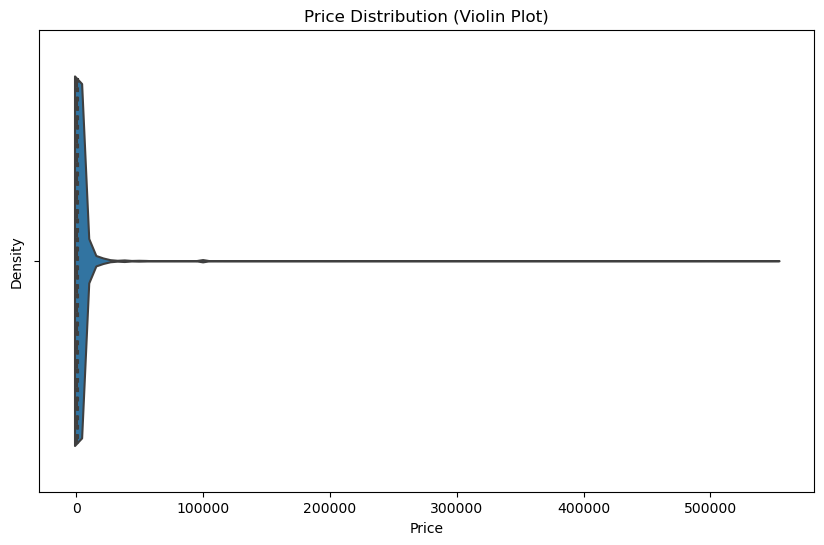

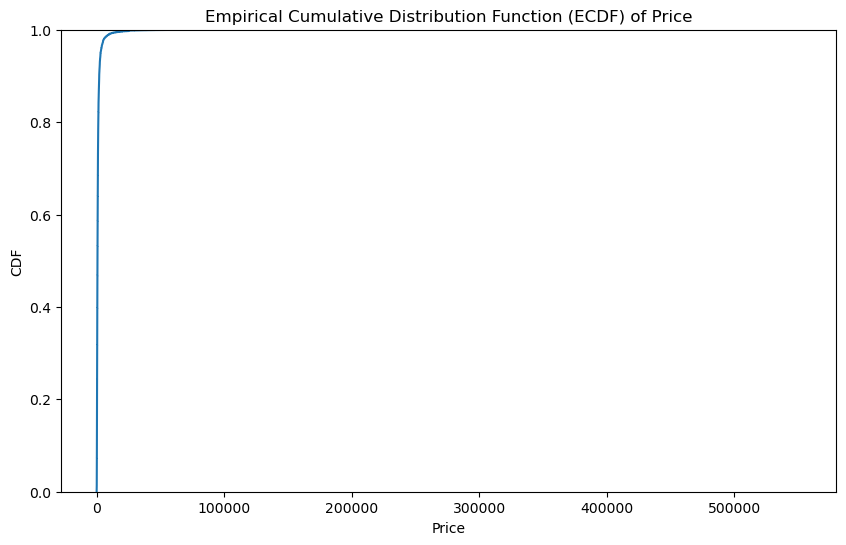

In [10]:
#distribution of price

# Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(listings['price'], kde=True, bins=30)
plt.title('Price Distribution with KDE')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=listings['price'])
plt.title('Price Distribution (Box Plot)')
plt.xlabel('Price')
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=listings['price'], inner='quartile')
plt.title('Price Distribution (Violin Plot)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# ECDF Plot
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=listings, x='price')
plt.title('Empirical Cumulative Distribution Function (ECDF) of Price')
plt.xlabel('Price')
plt.ylabel('CDF')
plt.show()


In [11]:
listings.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license']

In [12]:
# some statistical info

numerical_columns = listings.select_dtypes(include=['number']).columns.to_list()
numerical_columns = numerical_columns[5:]

listings[numerical_columns].describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count   34237.000000    36008.000000       36008.000000       25706.000000   
mean     1211.719572        4.419351          19.545545           1.046277   
std      5790.937363       22.738877          40.600380           1.157816   
min         0.000000        1.000000           0.000000           0.010000   
25%       361.000000        1.000000           0.000000           0.200000   
50%       660.000000        2.000000           4.000000           0.670000   
75%      1114.000000        3.000000          20.000000           1.500000   
max    552637.000000     1125.000000         638.000000          13.750000   

       calculated_host_listings_count  availability_365  \
count                    36008.000000      36008.000000   
mean                         9.493224        172.418907   
std                         25.677082        135.553905   
min                          1.000000          0.000000   
25%                          1.000000         43.000000   
50%                          2.000000        160.000000   
75%                          5.000000        316.000000   
max                        185.000000        365.000000   

       number_of_reviews_ltm  license  
count           36008.000000      0.0  
mean                7.117307      NaN  
std                11.662121      NaN  
min                 0.000000      NaN  
25%                 0.000000      NaN  
50%                 2.000000      NaN  
75%                 9.000000      NaN  
max               124.000000      NaN

This sums up the listings summary which contains 36008 row and 18 columns that covers the basic details such as id, name(client and host), location(latitude and longitude), monthly reviews and price according to the various factors.


### insights into data

* We found the total number of neighbourhood is 156 with copacabana having most of the listings.
* We found almost 80% of listings are entire home/ apartment while around 17-18% are private room.
* minimum nights has an average value of 4.41 and max value of 1125 which ofcourse is an indication of error.
* price is long tail skewed to the right with an average of 1211 and max of 552637.
* we also found that neighbourhood_group column consist of all null values

In [13]:
#Rio de Janeiro calendar data
calendar = pd.read_csv('Rio/calendar.csv')
calendar.head()

listing_id        date available    price  adjusted_price  minimum_nights  \
0       17878  2023-12-27         f  $350.00             NaN             5.0   
1       17878  2023-12-28         f  $350.00             NaN             5.0   
2       17878  2023-12-29         f  $350.00             NaN             5.0   
3       17878  2023-12-30         f  $350.00             NaN             5.0   
4       17878  2023-12-31         f  $350.00             NaN             5.0   

   maximum_nights  
0            28.0  
1            28.0  
2            28.0  
3            28.0  
4            28.0

In [14]:
calendar.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13145595 entries, 0 to 13145594
Data columns (total 7 columns):
 #   Column          Non-Null Count     Dtype  
---  ------          --------------     -----  
 0   listing_id      13145595 non-null  int64  
 1   date            13145595 non-null  object 
 2   available       13145595 non-null  object 
 3   price           13145595 non-null  object 
 4   adjusted_price  0 non-null         float64
 5   minimum_nights  13145572 non-null  float64
 6   maximum_nights  13145572 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 702.1+ MB


### Calender data

Nothing much to mention in this calendar dataset as one can see, we have listing id, date, availability and price with no null value, while mininum and maximum nights consists of few null values.

* We can notice that date columns is in string format and needs to be changed in date format.
* price is also a string which needs modification as well.

## Detailed Listings

In [15]:
#Rio de Janeiro detailed listing data

detailed_listings = pd.read_csv('Rio/detailed_listings.csv')
detailed_listings.head()

id                          listing_url       scrape_id last_scraped  \
0   17878   https://www.airbnb.com/rooms/17878  20231226034138   2023-12-27   
1   25026   https://www.airbnb.com/rooms/25026  20231226034138   2023-12-27   
2   35764   https://www.airbnb.com/rooms/35764  20231226034138   2023-12-27   
3   41198   https://www.airbnb.com/rooms/41198  20231226034138   2023-12-27   
4  326205  https://www.airbnb.com/rooms/326205  20231226034138   2023-12-27   

        source                                               name  \
0  city scrape  Condo in Rio de Janeiro · ★4.70 · 2 bedrooms ·...   
1  city scrape  Rental unit in Rio de Janeiro · ★4.72 · 1 bedr...   
2  city scrape  Loft in Rio de Janeiro · ★4.90 · 1 bedroom · 1...   
3  city scrape  Rental unit in Rio de Janeiro · ★4.21 · 2 bedr...   
4  city scrape  Condo in Rio de Janeiro · ★4.57 · 1 bedroom · ...   

   description                              neighborhood_overview  \
0          NaN  This is the one of the bests spots in Rio. Bec...   
1          NaN  Copacabana is a lively neighborhood and the ap...   
2          NaN  Our guests will experience living with a local...   
3          NaN                                                NaN   
4          NaN                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/65320518/3069...    68997  ...   
1  https://a0.muscache.com/pictures/a745aa21-b8dd...   102840  ...   
2  https://a0.muscache.com/pictures/23782972/1d3e...   153691  ...   
3  https://a0.muscache.com/pictures/3576716/2d6a9...   178975  ...   
4  https://a0.muscache.com/pictures/c550151d-910c...  1603206  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.91                   4.77                4.67   
1                        4.92                   4.84                4.60   
2                        4.95                   4.94                4.89   
3                        4.56                   4.44                4.38   
4                        4.77                   4.83                4.59   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              1   
1     NaN                f                              1   
2     NaN                f                              1   
3     NaN                f                              2   
4     NaN                f                              5   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           1   
2                                           1   
3                                           2   
4                                           5   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.90  
1                                           0              1.67  
2                                           0              2.82  
3                                           0              0.13  
4                                           0              1.07  

[5 rows x 75 columns]

In [16]:
#some info about data

print("No. of rows: ", detailed_listings.shape[0])
print("No. of columns: ", detailed_listings.shape[1])

print('-'*30)

detailed_listings.info()

No. of rows:  36008
No. of columns:  75
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36008 entries, 0 to 36007
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36008 non-null  int64  
 1   listing_url                                   36008 non-null  object 
 2   scrape_id                                     36008 non-null  int64  
 3   last_scraped                                  36008 non-null  object 
 4   source                                        36008 non-null  object 
 5   name                                          36008 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         18272 non-null  object 
 8   picture_url                                   36008 non-null  obj

In [17]:
#columns with no missing values

detailed_listings.columns[detailed_listings.isnull().mean() == 0].tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'picture_url',
 'host_id',
 'host_url',
 'host_verifications',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'amenities',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms']

In [18]:
#columns with more than 75% of missing values

detailed_listings.columns[detailed_listings.isnull().mean() > 0.75].tolist()

['description',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'bedrooms',
 'calendar_updated',
 'license']

In [19]:
#columns with 100% missing values

detailed_listings.columns[detailed_listings.isnull().mean() == 1].tolist()

['description',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'bedrooms',
 'calendar_updated',
 'license']

This detailed Rio de Janeiro listing consits 36008 rows and 75 columns, where we can notice we almost have every columns from listings summary dataframe with addition of 57 more columns.

Things to consider in Wrangling phase:

* we will eliminate few columns which does not contribute to our question of interest as well columns with more than 75% of missing values
* Handle missing values and categorical variables
* we will also look over the issues in dataset

## Data Wrangling

### Calendar dataset
* change the date column format from string to datetime.
* change the format of Price column from string to numerical (float).

In [20]:
#change date column format

calendar.date = pd.to_datetime(calendar.date)
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13145595 entries, 0 to 13145594
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 702.1+ MB


In [21]:
# drops the rows in calendar dataset where price has missing values
calendar = calendar.dropna(subset = ['price'], axis =0)

In [22]:
calendar.shape

(13145595, 7)

In [23]:
# coverts price into float format

def clean_price(price):
    
    '''
    cleans the price columns by removing '$' from price and
    then converting string to float.
    '''
    
    try:
        if ',' in price:
            price = price.replace(',','')
        
        price = price[1:]
        return float(str(price))
    except:
        return price

In [24]:
#cleans the price and convert it into float
calendar['price'] = calendar.price.apply(lambda x: clean_price(x))
calendar.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13145595 entries, 0 to 13145594
Data columns (total 7 columns):
 #   Column          Non-Null Count     Dtype         
---  ------          --------------     -----         
 0   listing_id      13145595 non-null  int64         
 1   date            13145595 non-null  datetime64[ns]
 2   available       13145595 non-null  object        
 3   price           13145595 non-null  float64       
 4   adjusted_price  0 non-null         float64       
 5   minimum_nights  13145572 non-null  float64       
 6   maximum_nights  13145572 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 702.1+ MB


In [25]:
calendar.head()

listing_id       date available  price  adjusted_price  minimum_nights  \
0       17878 2023-12-27         f  350.0             NaN             5.0   
1       17878 2023-12-28         f  350.0             NaN             5.0   
2       17878 2023-12-29         f  350.0             NaN             5.0   
3       17878 2023-12-30         f  350.0             NaN             5.0   
4       17878 2023-12-31         f  350.0             NaN             5.0   

   maximum_nights  
0            28.0  
1            28.0  
2            28.0  
3            28.0  
4            28.0

In [26]:
#drop null column

calendar = calendar.drop(columns = ['adjusted_price'])

In [27]:
#make month and year columns from date 
calendar['month'], calendar['year'] = calendar.date.dt.month, calendar.date.dt.year
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13145595 entries, 0 to 13145594
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   minimum_nights  float64       
 5   maximum_nights  float64       
 6   month           int64         
 7   year            int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 802.3+ MB


In [28]:
calendar.describe()

listing_id         price  minimum_nights  maximum_nights  \
count  1.314560e+07  1.314560e+07    1.314557e+07    1.314557e+07   
mean   4.445638e+17  7.611958e+02    4.370234e+00    5.654190e+02   
std    4.418460e+17  4.480228e+03    2.010499e+01    4.726751e+02   
min    1.787800e+04  0.000000e+00    1.000000e+00    1.000000e+00   
25%    2.864003e+07  2.000000e+02    2.000000e+00    9.000000e+01   
50%    5.760813e+17  3.200000e+02    2.000000e+00    3.650000e+02   
75%    8.726716e+17  6.090000e+02    3.000000e+00    1.125000e+03   
max    1.053823e+18  5.000000e+05    1.125000e+03    1.825000e+03   

              month          year  
count  1.314560e+07  1.314560e+07  
mean   6.499750e+00  2.023987e+03  
std    3.444518e+00  1.140377e-01  
min    1.000000e+00  2.023000e+03  
25%    4.000000e+00  2.024000e+03  
50%    7.000000e+00  2.024000e+03  
75%    9.000000e+00  2.024000e+03  
max    1.200000e+01  2.024000e+03

# Going back to our questions of interest

### 1) Most expensive months to visit Rio de Janeiro 

analyzing the average price of listings available every month

In [29]:
calendar.available.value_counts()

t    6667756
f    6477839
Name: available, dtype: int64

* Looks like we have a good amount of split between available and unvailable listings

In [30]:
not_available_mask = calendar.available == 'f'
available_mask = calendar.available == 't'

In [31]:
#total house count daily throughout the year
daily_available_count = calendar[available_mask].groupby('date').count()[['price']]
daily_available_count = daily_available_count.rename({'price':"total_available_houses"}, axis = 'columns')

In [32]:
#average price of above house daily throughout the year
daily_average_price = calendar[available_mask].groupby('date').mean()[['price']]
daily_average_price = daily_average_price.rename({"price":"average_price"},axis='columns')

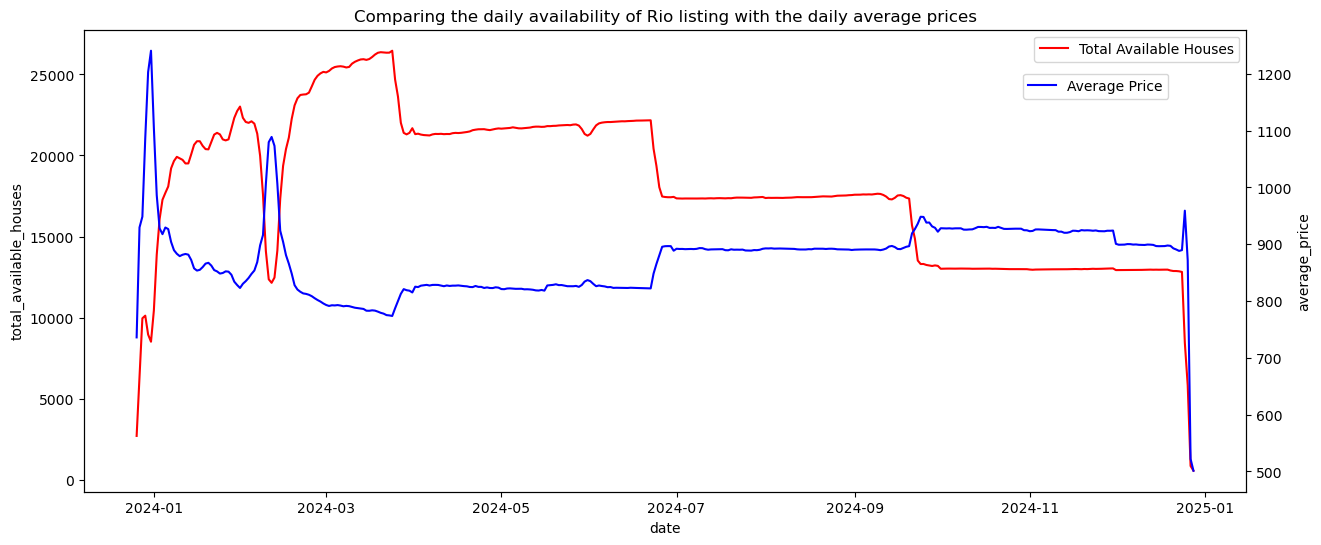

In [33]:
#plotting total available house and their average price along a year
f, ax = plt.subplots(figsize = (15, 6))



plt_1 = sns.lineplot(x = daily_available_count.index, y = "total_available_houses",
                   data = daily_available_count, color = 'r', legend = False)

ax2 = ax.twinx()

plt_2 = sns.lineplot(x = daily_average_price.index, y = "average_price",
                    data = daily_average_price, ax = ax2, color = 'b', legend = False)

ax.legend(['Total Available Houses'], loc='upper right')
ax2.legend(['Average Price'], loc='upper right', bbox_to_anchor = (0.939,0.92))


ax.set_title('Comparing the daily availability of Rio listing with the daily average prices')
plt.show();

In [34]:
#average price of listings by month
monthly_average_price = calendar[available_mask].groupby('month').mean()[['price']]
monthly_average_price = monthly_average_price.rename({'price':'monthly_average_price'}, axis = 'columns')

In [35]:
#house counts by months
monthly_available_count = calendar[available_mask].groupby('month').count()[['price']]
monthly_available_count = monthly_available_count.rename({'price':'monthly_available_house_count'},axis = 'columns')

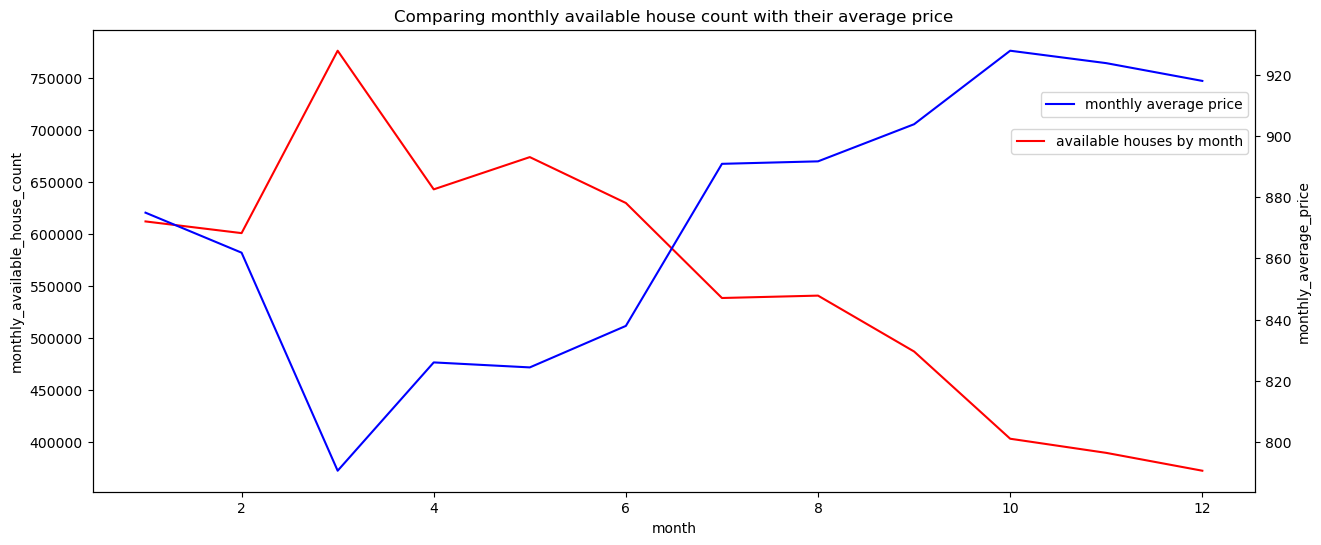

In [36]:
f, ax = plt.subplots(figsize = (15, 6))
plt_1 = sns.lineplot(x = monthly_available_count.index, y = 'monthly_available_house_count',
                    data = monthly_available_count, color ='r', legend = False)

ax2 = ax.twinx()
plt_2 = sns.lineplot(x = monthly_average_price.index, y= 'monthly_average_price',
                    data = monthly_average_price, ax = ax2, color = 'b', legend = False)

ax.legend(['available houses by month'], loc = 'upper right', bbox_to_anchor = (1, 0.8))
ax2.legend(['monthly average price'], loc = 'upper right', bbox_to_anchor = (1, 0.88))

ax.set_title('Comparing monthly available house count with their average price');

#### Insights:

* One can notice that there is clear correlation between total available houses and their average price.
* Low availability causing the price to go up and vice versa.
* There is clear trend and seasonality in daily average price and availability, which is very unstable at the start of the year and it gets consistent in the middle of the year.
* Average monthly price soars up at the end of the year, assuming the new year hype, while cheapest months to book listing between February and April.

### 2) Most and least expensive Neighbourhood in boston

In [37]:
#grouping the avg. listing price according the neighbourhood
Expensive_neighbourhood = listings.groupby(['neighbourhood'])['price'].mean().sort_values(ascending = False).nlargest(20)
Expensive_neighbourhood

neighbourhood
São Cristóvão              8674.779221
Estácio                    8478.032787
Joá                        7879.917910
São Conrado                2487.029326
Jacarezinho                1949.000000
Itanhangá                  1938.118012
Anchieta                   1846.666667
Ipanema                    1726.543616
Alto da Boa Vista          1719.897436
Lagoa                      1567.038911
Leblon                     1547.793061
Bangu                      1381.000000
Barra da Tijuca            1350.845188
Gávea                      1337.539171
Copacabana                 1311.726228
Freguesia (Jacarepaguá)    1307.406250
Caju                       1299.000000
Cachambi                   1282.791667
Curicica                   1271.696629
Coelho Neto                1226.700000
Name: price, dtype: float64

In [38]:
least_expensive_neighbourhood =listings.groupby(['neighbourhood'])['price'].mean().sort_values(ascending = True)
least_expensive_neighbourhood

neighbourhood
Mangueira                73.000000
Gericinó                110.000000
Jardim América          135.000000
Vicente de Carvalho     137.500000
Tomás Coelho            142.400000
                          ...     
São Conrado            2487.029326
Joá                    7879.917910
Estácio                8478.032787
São Cristóvão          8674.779221
Magalhães Bastos               NaN
Name: price, Length: 156, dtype: float64

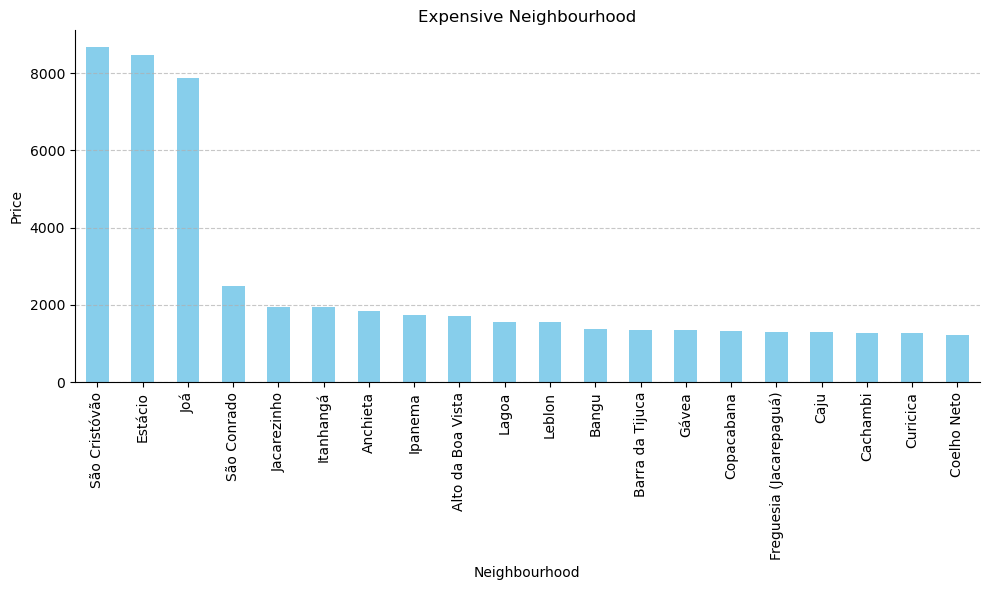

In [39]:
#setting figure size and bar color
plt.figure(figsize = (10,6))
bar_color = 'skyblue'
Expensive_neighbourhood.plot(kind = 'bar' , color= bar_color)

#setting grid attribute and getting rid of unnecessary graph border
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Title
plt.title('Expensive Neighbourhood')
plt.ylabel('Price')
plt.xlabel('Neighbourhood')

#preventing overlapping layout
plt.tight_layout()
plt.show()

#### Insights:
* As one can see, the most expensive Rio Neighbourhood is <b> São Cristóvão </b>, followed by <b>Estácio </b> and <b>Joá</b>.
* While the least expensive Neighbourhood is <b>Mangueira</b>.

## 3) What are the factors associated with price of listings

In [40]:
detailed_listings.info(max_cols = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36008 entries, 0 to 36007
Columns: 75 entries, id to reviews_per_month
dtypes: float64(21), int64(21), object(33)
memory usage: 20.6+ MB


In [41]:
#Dropping the redundant the column
detailed_listings.drop(columns = 'neighbourhood', inplace = True, axis =1)

### Handling the missing values in columns

In [42]:
#Dropping columns with more than 75% of missing values

cols_with_missing_val = list(set(detailed_listings.columns[detailed_listings.isnull().mean()>0.75]))
print("columns with 75% of missing values:",cols_with_missing_val)

print('-'*80)

detailed_listings.drop(columns = cols_with_missing_val, inplace =True, axis = 1)
detailed_listings.info(max_cols = 0)

columns with 75% of missing values: ['neighbourhood_group_cleansed', 'bathrooms', 'description', 'bedrooms', 'license', 'calendar_updated']
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36008 entries, 0 to 36007
Columns: 68 entries, id to reviews_per_month
dtypes: float64(15), int64(21), object(32)
memory usage: 18.7+ MB


### Handling text columns

* Create additional binary columns to indicate whether specific column values are present in the existing columns for <b>neighborhood_overview</b>, <b>host_about</b>.

* Replace "t" and "f" values categorical columns with binary version of same for <b>host_is_superhost, instant_bookable, host_identity_verified, host_has_profile_pic</b>.

In [43]:
detailed_listings['has_neighborhood_info'] = detailed_listings.neighborhood_overview.apply(lambda x: 0 if pd.isnull(x) else 1)
detailed_listings['has_host_info'] = detailed_listings.host_about.apply(lambda x: 0 if pd.isnull(x) else 1)

#fixing t and f columns
detailed_listings['host_is_superhost'] = detailed_listings.host_is_superhost.apply(lambda x: 1 if x == 't' else 0)
detailed_listings['instant_bookable'] = detailed_listings.instant_bookable.apply(lambda x: 1 if x == 't' else 0)
detailed_listings['host_identity_verified'] = detailed_listings.host_identity_verified.apply(lambda x: 1 if x == 't' else 0)

In [44]:
detailed_listings.info(max_cols = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36008 entries, 0 to 36007
Columns: 70 entries, id to has_host_info
dtypes: float64(15), int64(26), object(29)
memory usage: 19.2+ MB


In [45]:
#Dropping redundant columns
redundant_columns = ['id','scrape_id','host_id','has_availability','host_picture_url','host_neighbourhood',
                     'listing_url','last_scraped','host_about','host_verifications',
                     'name','host_name','neighborhood_overview','calendar_last_scraped',
                     'host_url','host_thumbnail_url','host_location','amenities',
                     'picture_url','host_has_profile_pic','source','host_total_listings_count']
print('Redundant_columns:',redundant_columns)
print('--'*45)
detailed_listings.drop(columns = redundant_columns, inplace = True)
detailed_listings.info(max_cols = 0)

Redundant_columns: ['id', 'scrape_id', 'host_id', 'has_availability', 'host_picture_url', 'host_neighbourhood', 'listing_url', 'last_scraped', 'host_about', 'host_verifications', 'name', 'host_name', 'neighborhood_overview', 'calendar_last_scraped', 'host_url', 'host_thumbnail_url', 'host_location', 'amenities', 'picture_url', 'host_has_profile_pic', 'source', 'host_total_listings_count']
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36008 entries, 0 to 36007
Columns: 48 entries, host_since to has_host_info
dtypes: float64(14), int64(23), object(11)
memory usage: 13.2+ MB


In [46]:
#Remaining object columns in dataframe
detailed_listings.select_dtypes(include = ['object']).columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'bathrooms_text', 'price', 'first_review', 'last_review'],
      dtype='object')

### We can concat some types into one group for some features which occurs less as it will increase the complexity of our model

In [47]:
# Adjust the display settings to show all rows
pd.set_option('display.max_rows', None)

# Display the value counts for the 'property_type' column
print(detailed_listings['property_type'].value_counts())


Entire rental unit                    22614
Private room in rental unit            4154
Entire condo                           1907
Entire home                            1667
Private room in home                   1226
Entire serviced apartment               843
Entire loft                             771
Private room in condo                   405
Room in hotel                           283
Private room in bed and breakfast       270
Shared room in rental unit              208
Shared room in home                     183
Entire guesthouse                       121
Room in aparthotel                      118
Entire villa                            103
Private room in guest suite             100
Private room in guesthouse               90
Private room in serviced apartment       83
Entire guest suite                       63
Shared room in hostel                    61
Shared room in bed and breakfast         58
Entire vacation home                     45
Private room in casa particular 

In [48]:
# Reset the display settings to default
pd.reset_option('display.max_rows')


In [49]:
#feature engineering for property_type column
property_value_counts = detailed_listings.property_type.value_counts()
values_to_replace = property_value_counts[property_value_counts<100].index
detailed_listings.property_type.replace(values_to_replace, 'other_types', inplace = True)
detailed_listings.property_type.value_counts()

Entire rental unit                   22614
Private room in rental unit           4154
Entire condo                          1907
Entire home                           1667
Private room in home                  1226
other_types                           1035
Entire serviced apartment              843
Entire loft                            771
Private room in condo                  405
Room in hotel                          283
Private room in bed and breakfast      270
Shared room in rental unit             208
Shared room in home                    183
Entire guesthouse                      121
Room in aparthotel                     118
Entire villa                           103
Private room in guest suite            100
Name: property_type, dtype: int64

In [50]:
pd.set_option('display.max_rows', None)
detailed_listings.room_type.value_counts()

Entire home/apt    28468
Private room        6910
Shared room          592
Hotel room            38
Name: room_type, dtype: int64

In [51]:
detailed_listings.bathrooms_text.value_counts()

1 bath               16708
2 baths               7191
1 shared bath         2197
1.5 baths             1945
1 private bath        1875
3 baths               1762
2.5 baths             1250
2 shared baths         509
3.5 baths              467
1.5 shared baths       438
4 baths                405
4.5 baths              176
5 baths                162
6 baths                100
5.5 baths               96
2.5 shared baths        83
Half-bath               77
3 shared baths          75
0 baths                 63
7 baths                 63
6.5 baths               50
4 shared baths          47
8 baths                 34
0 shared baths          29
7.5 baths               27
Shared half-bath        21
3.5 shared baths        20
5 shared baths          14
4.5 shared baths        14
8.5 baths               10
11 baths                10
9 baths                  7
10 baths                 7
9.5 baths                6
7 shared baths           6
Private half-bath        6
6 shared baths           5
1

In [52]:
pd.reset_option('display.max_rows')

In [53]:
#feature engineering for bathrooms_text column
bathrooms_value_counts = detailed_listings.bathrooms_text.value_counts()
values_to_replace = bathrooms_value_counts[bathrooms_value_counts<150].index
detailed_listings.bathrooms_text.replace(values_to_replace, 'other_bathrooms_text', inplace = True)
detailed_listings.bathrooms_text.value_counts()

1 bath                  16708
2 baths                  7191
1 shared bath            2197
1.5 baths                1945
1 private bath           1875
3 baths                  1762
2.5 baths                1250
other_bathrooms_text      893
2 shared baths            509
3.5 baths                 467
1.5 shared baths          438
4 baths                   405
4.5 baths                 176
5 baths                   162
Name: bathrooms_text, dtype: int64

In [54]:
pd.set_option('display.max_rows', None)
detailed_listings.neighbourhood_cleansed.value_counts()

Copacabana                  10982
Barra da Tijuca              3501
Ipanema                      3455
Recreio dos Bandeirantes     1804
Leblon                       1742
Jacarepaguá                  1680
Botafogo                     1580
Centro                       1187
Santa Teresa                 1151
Flamengo                      808
Leme                          700
Camorim                       576
Laranjeiras                   565
Tijuca                        452
São Conrado                   363
Catete                        331
Glória                        284
Lagoa                         278
Gávea                         229
Jardim Botânico               213
Vidigal                       211
Humaitá                       204
Itanhangá                     167
Vargem Pequena                152
Barra de Guaratiba            152
Taquara                       147
Urca                          144
Vila Isabel                   143
Joá                           135
Freguesia (Jac

In [55]:
pd.reset_option('display.max_rows')

In [56]:
#feature engineering for neighbourhood_cleansed column
neighbourhood_value_counts = detailed_listings.neighbourhood_cleansed.value_counts()
values_to_replace = neighbourhood_value_counts[neighbourhood_value_counts<150].index
detailed_listings.neighbourhood_cleansed.replace(values_to_replace, 'other_neighbourhoods', inplace = True)
detailed_listings.neighbourhood_cleansed.value_counts()

Copacabana                  10982
Barra da Tijuca              3501
Ipanema                      3455
other_neighbourhoods         3241
Recreio dos Bandeirantes     1804
Leblon                       1742
Jacarepaguá                  1680
Botafogo                     1580
Centro                       1187
Santa Teresa                 1151
Flamengo                      808
Leme                          700
Camorim                       576
Laranjeiras                   565
Tijuca                        452
São Conrado                   363
Catete                        331
Glória                        284
Lagoa                         278
Gávea                         229
Jardim Botânico               213
Vidigal                       211
Humaitá                       204
Itanhangá                     167
Vargem Pequena                152
Barra de Guaratiba            152
Name: neighbourhood_cleansed, dtype: int64

In [57]:
#Numerical columns in dataframe
numerical_columns = detailed_listings.select_dtypes(include = ['float', 'int']).columns
numerical_columns

Index(['host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'latitude', 'longitude', 'accommodates', 'beds', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'has_neighborhood_info', 'h

### Before proceeding with any analysis or modeling task, it's crucial to address missing data and enhance the quality of our dataset

* Handling missing values and improving quality of specific columns through feature engineering

In [58]:
#remove rows of dataframe where price is missing
print("missing values in price column: ",detailed_listings['price'].isnull().sum())
detailed_listings = detailed_listings.dropna(subset=['price'], axis =0)

missing values in price column:  1771


In [59]:
#missing values in each features
detailed_listings.isnull().sum()

host_since                                         9
host_response_time                              4062
host_response_rate                              4062
host_acceptance_rate                            4086
host_is_superhost                                  0
host_listings_count                                9
host_identity_verified                             0
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms_text                                    30
beds                                             685
price                                              0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                        

In [60]:
#drop missing rows from review related columns
review_related_cols = ['review_scores_checkin','review_scores_location','review_scores_value']
detailed_listings = detailed_listings.dropna(subset = review_related_cols,axis = 0)

In [61]:
detailed_listings = detailed_listings.dropna(subset = 'reviews_per_month', axis = 0)

In [62]:
detailed_listings.describe()

host_is_superhost  host_listings_count  host_identity_verified  \
count       24626.000000         24621.000000            24626.000000   
mean            0.346219            18.009179                0.847032   
std             0.475774            99.726436                0.359964   
min             0.000000             1.000000                0.000000   
25%             0.000000             1.000000                1.000000   
50%             0.000000             2.000000                1.000000   
75%             1.000000             6.000000                1.000000   
max             1.000000          1405.000000                1.000000   

           latitude     longitude  accommodates          beds  minimum_nights  \
count  24626.000000  24626.000000  24626.000000  24340.000000    24626.000000   
mean     -22.967975    -43.242423      3.962154      2.462613        3.616868   
std        0.033511      0.094547      2.218288      2.024451       17.605664   
min      -23.073276    -43.701286      1.000000      1.000000        1.000000   
25%      -22.984460    -43.260047      2.000000      1.000000        2.000000   
50%      -22.973102    -43.193351      4.000000      2.000000        2.000000   
75%      -22.959591    -43.184843      5.000000      3.000000        3.000000   
max      -22.750510    -43.104400     16.000000     56.000000      999.000000   

       maximum_nights  minimum_minimum_nights  ...  review_scores_location  \
count    24626.000000            24626.000000  ...            24626.000000   
mean       474.382157                3.156826  ...                4.857771   
std        460.416148               13.695218  ...                0.321321   
min          1.000000                1.000000  ...                0.000000   
25%         60.000000                1.000000  ...                4.850000   
50%        365.000000                2.000000  ...                4.970000   
75%       1125.000000                3.000000  ...                5.000000   
max       1125.000000              960.000000  ...                5.000000   

       review_scores_value  instant_bookable  calculated_host_listings_count  \
count         24626.000000      24626.000000                    24626.000000   
mean              4.702024          0.240071                        9.874279   
std               0.440436          0.427135                       26.247463   
min               0.000000          0.000000                        1.000000   
25%               4.620000          0.000000                        1.000000   
50%               4.810000          0.000000                        2.000000   
75%               5.000000          0.000000                        5.000000   
max               5.000000          1.000000                      185.000000   

       calculated_host_listings_count_entire_homes  \
count                                 24626.000000   
mean                                      9.009137   
std                                      26.007124   
min                                       0.000000   
25%                                       1.000000   
50%                                       1.000000   
75%                                       3.000000   
max                                     185.000000   

       calculated_host_listings_count_private_rooms  \
count                                  24626.000000   
mean                                       0.734955   
std                                        1.952107   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        1.000000   
max                                       21.000000   

       calculated_host_listings_count_shared_rooms  reviews_per_month  \
count                                 24626.000000       24626.000000   
mean                                      0.121051           1.075

Looking at those metrics for different columns, we can conclude that our dataset has tons of outliers and unstable values

In [63]:
#returns the maximum limit value, beyond which data points can be considered outliers.
def get_max_fence(column):
    qt = detailed_listings[column].quantile([0.25,0.75])
    upper = qt.values[1]
    iqr = upper-qt.values[0]
    max_fence = upper + 1.5*(iqr)
    return max_fence

In [64]:
#returns two seaborn boxplots with one zoomed in around interquartile range
def box_plot(column):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(16,6)
    _ = sns.boxplot(x=detailed_listings[column], ax = ax1)
    ax1.set_title(f'{column} boxplot')
    ax2.set_title(f'Zooming in the {column} boxplot')
    ax2.set_xlim((-0.1,1.1*get_max_fence(column)))
    _ = sns.boxplot(x=detailed_listings[column], ax = ax2)

Cleaning and Transforming <b>host_listings_count</b> column

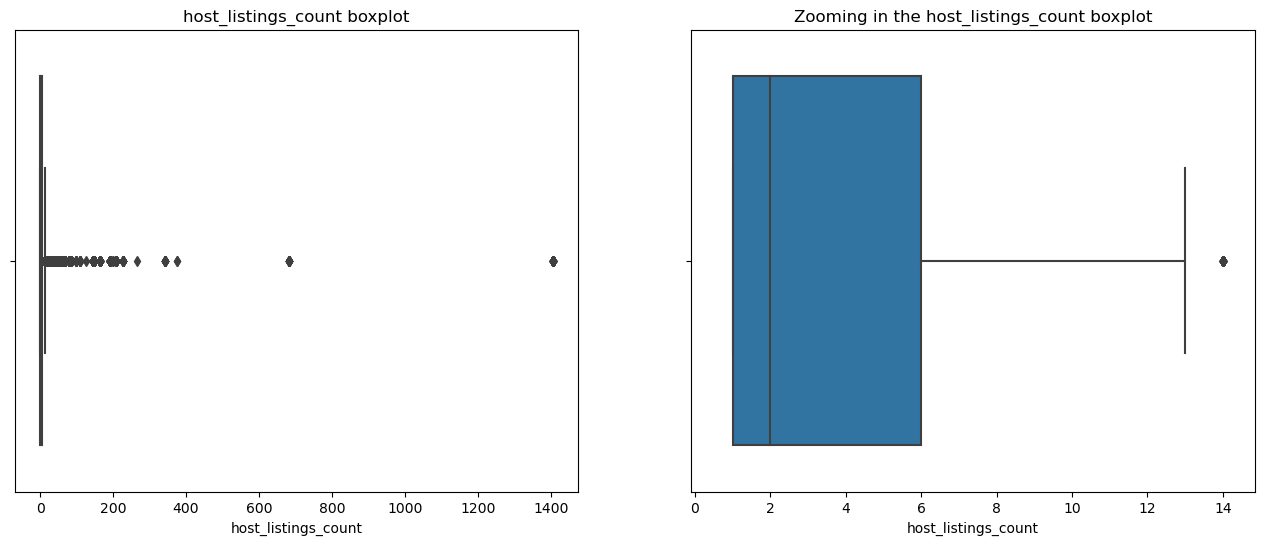

In [65]:
box_plot('host_listings_count')

<Axes: xlabel='host_listings_count', ylabel='Density'>

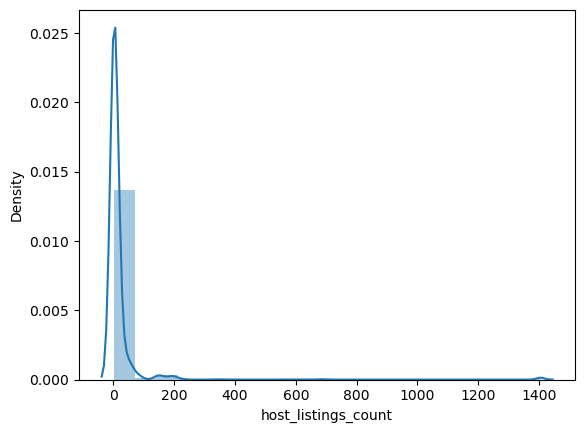

In [66]:
sns.distplot(detailed_listings.host_listings_count, bins = 20)

In [67]:
get_max_fence('host_listings_count')

13.5

Based on the selected method, any values exceeding 13.5 are considered outliers. Given the substantial presence of outliers in the dataset, a decision has been made to exclude them from the analysis. As the primary objective of the study is to identify the factors influencing prices, removing outliers ensures a more accurate examination of the underlying relationships and patterns within the data.

In [68]:
rows_before = detailed_listings.shape[0]
detailed_listings = detailed_listings[detailed_listings['host_listings_count'] <= get_max_fence('host_listings_count')]
print(f'{rows_before-detailed_listings.shape[0]} rows were deleted.')

3756 rows were deleted.


<Axes: xlabel='host_listings_count', ylabel='Density'>

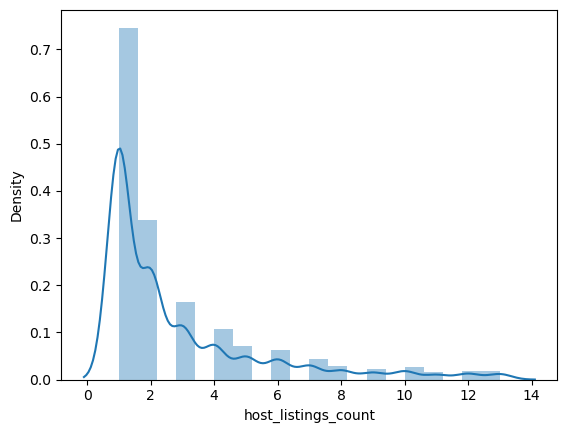

In [69]:
sns.distplot(detailed_listings.host_listings_count, bins = 20)

In [70]:
from scipy.stats import skew

# Calculate skewness
skewness = skew(detailed_listings.host_listings_count)

print("Skewness:", skewness)

Skewness: 1.9079615875027485


As we can see, datapoints are heavily skewed, we will tranform our data to bring the skewness down and make it more normal

In [71]:
import math

In [72]:
#log transformation for positive skew data
#detailed_listings['host_listings_count'] = [math.log1p(d) for d in detailed_listings.host_listings_count]
#sns.distplot(detailed_listings.host_listings_count, bins = 20)

In [73]:
#skew(detailed_listings.host_listings_count)

In [74]:
from scipy.stats import boxcox
detailed_listings['host_listings_count'],lam = boxcox(detailed_listings.host_listings_count)

In [75]:
skew(detailed_listings.host_listings_count)


0.25028548585166527

We are able to bring skewness down 0.25 from almost 2.0

### Cleaning and Transforming host_listings_count column

In [76]:
detailed_listings['price'] = detailed_listings.price.apply(lambda x: clean_price(x))
detailed_listings.price.head()

0    1357.0
1     865.0
2     373.0
3    1701.0
4     366.0
Name: price, dtype: float64

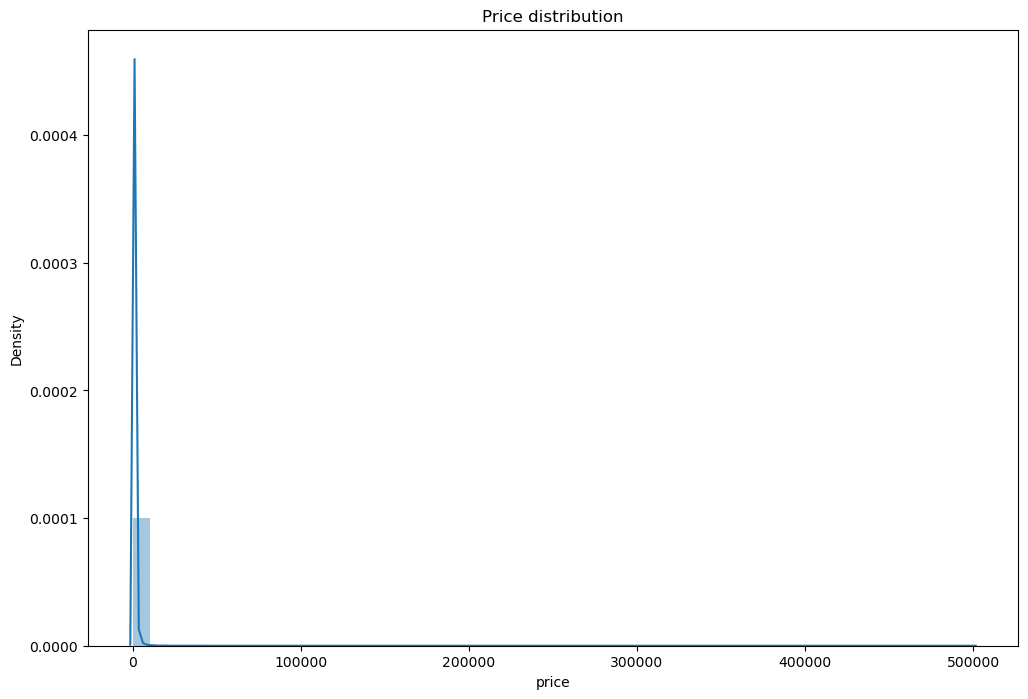

In [77]:
plt.figure(figsize=(12,8))
ax = sns.distplot(detailed_listings['price'],norm_hist=True)
_ = ax.set_title('Price distribution')

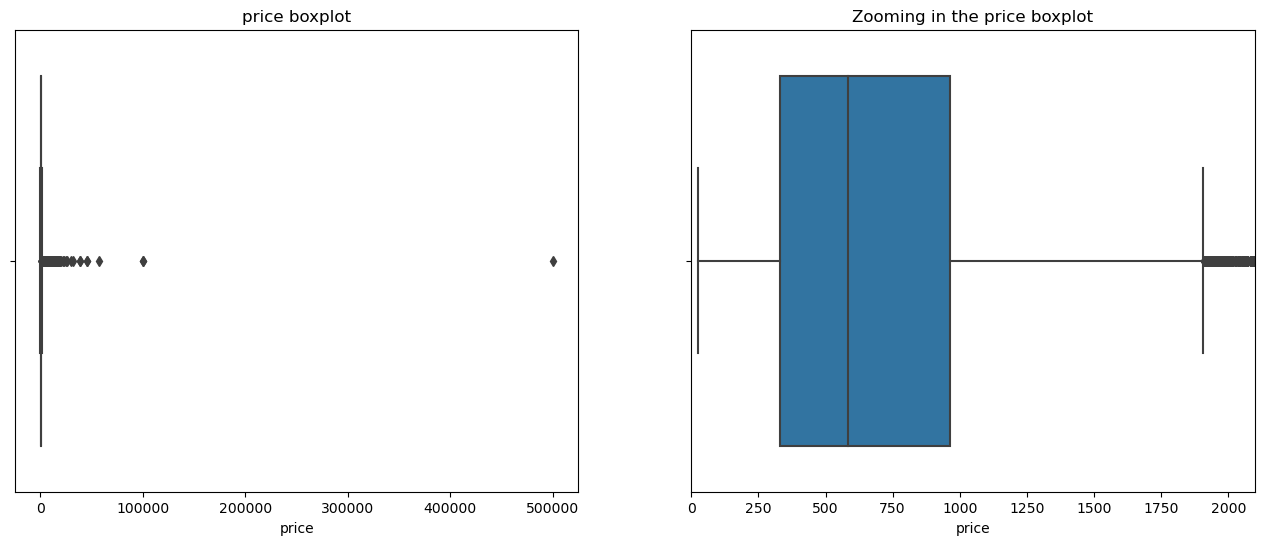

In [78]:
box_plot('price')

tons of outliers

In [79]:
get_max_fence('price')

1907.875

This shows us that the daily prices over 1907.875 are outliers of our regression, so let's remove them.

In [80]:
rows_before = detailed_listings.shape[0]
detailed_listings = detailed_listings[detailed_listings['price'] <= get_max_fence('price')]
print(f'{rows_before-detailed_listings.shape[0]} rows were removed')

1455 rows were removed


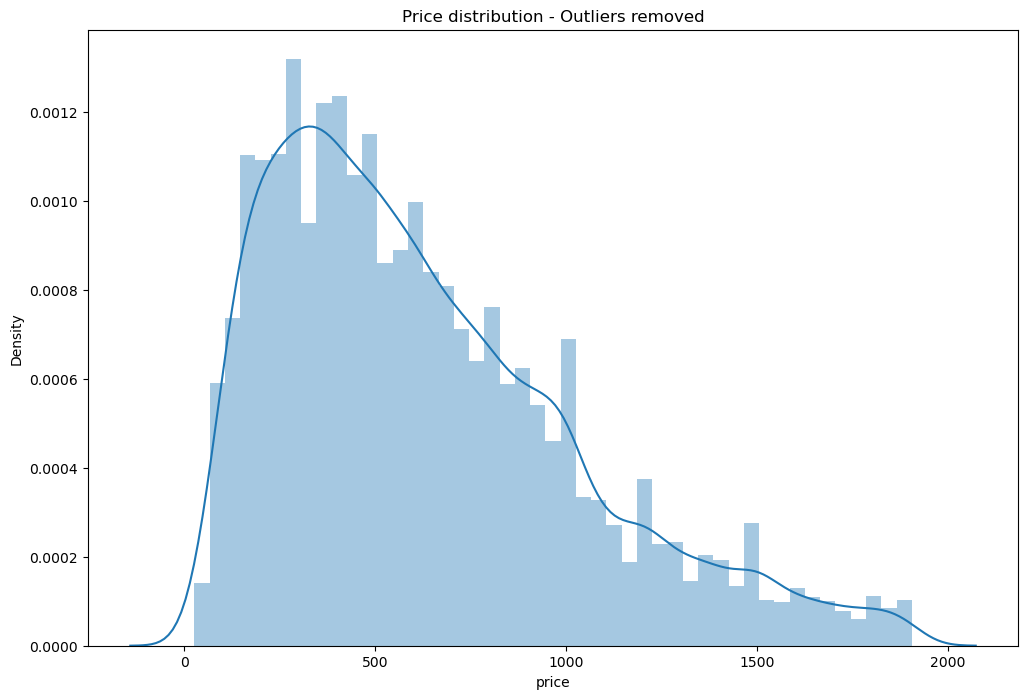

In [81]:
plt.figure(figsize=(12,8))
ax = sns.distplot(detailed_listings['price'],norm_hist=True)
_ = ax.set_title('Price distribution - Outliers removed')

distribution looks way better now, we will do some more transformation on price for positive skewness while using for regression

### Top six property types sorted by price

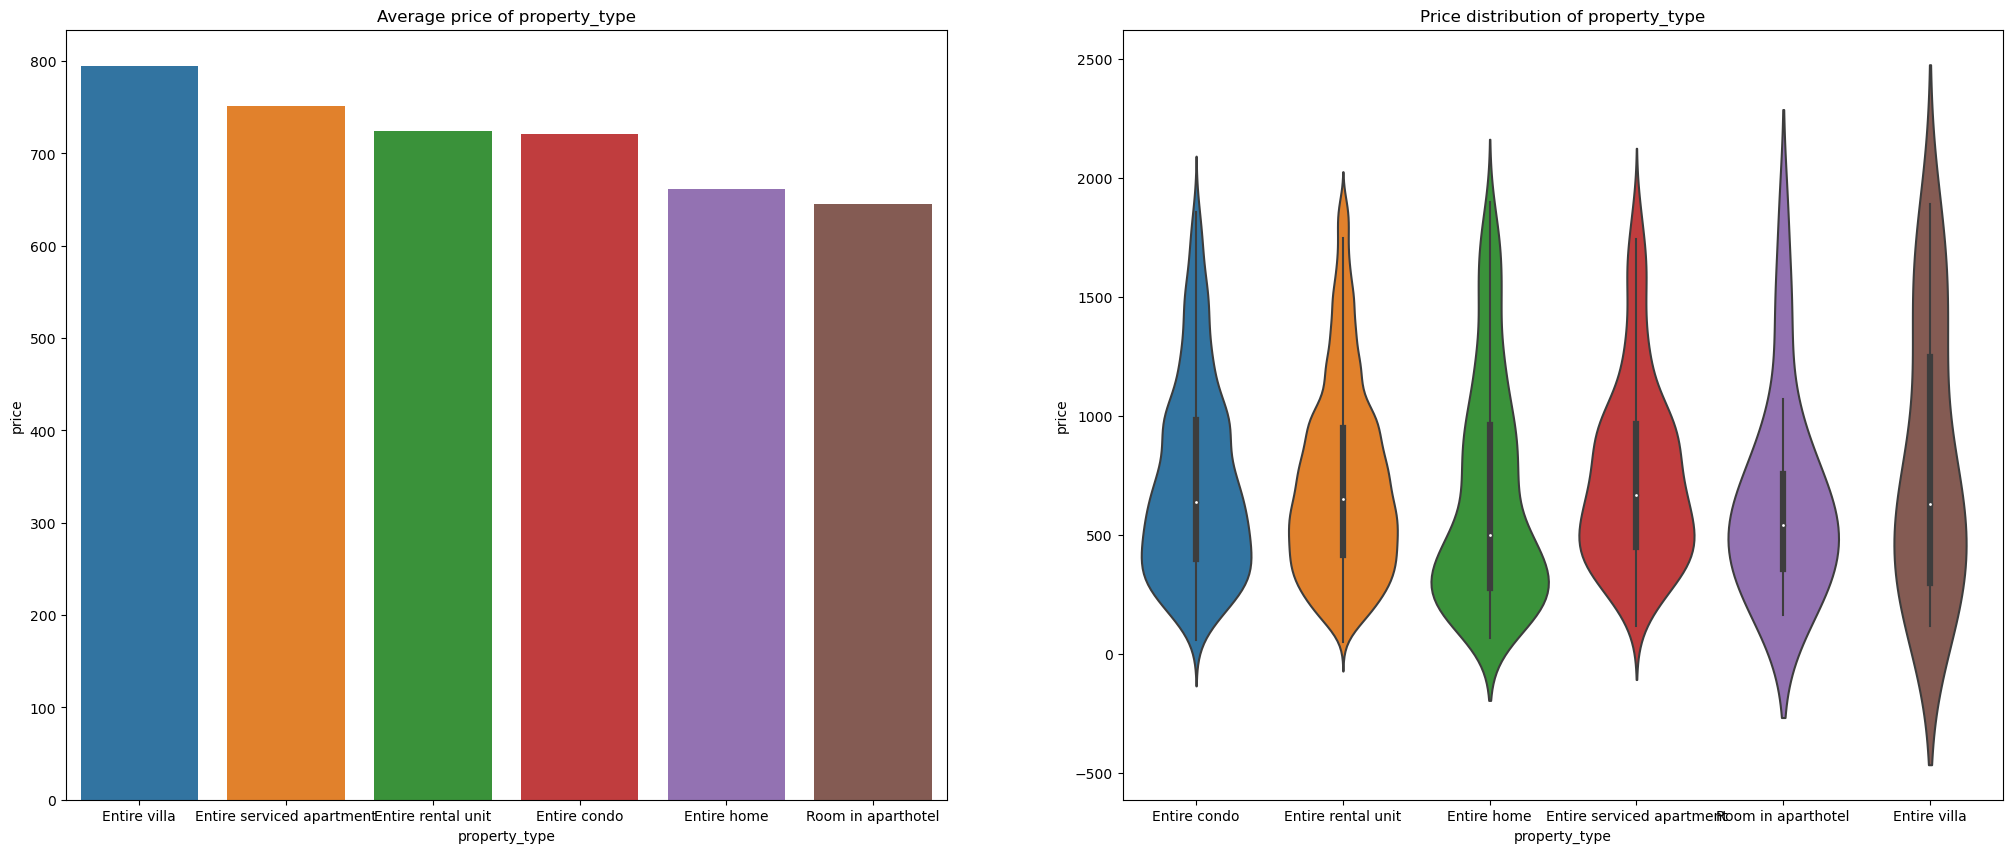

In [82]:

aa = detailed_listings.groupby(by='property_type').mean().sort_values(by='price',ascending=False).iloc[0:6]
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(25,10)
violin_data=detailed_listings.loc[detailed_listings['property_type'].isin(aa.index)]
_ =  sns.barplot(x=aa.index, y='price', data=aa,ax=ax1)
_ = ax1.set_title('Average price of property_type')
_ = ax2.set_title('Price distribution of property_type')
_ = sns.violinplot(x = 'property_type', y =  'price',data=violin_data,ax=ax2)

Cleaning and Transforming <b>beds</b> column

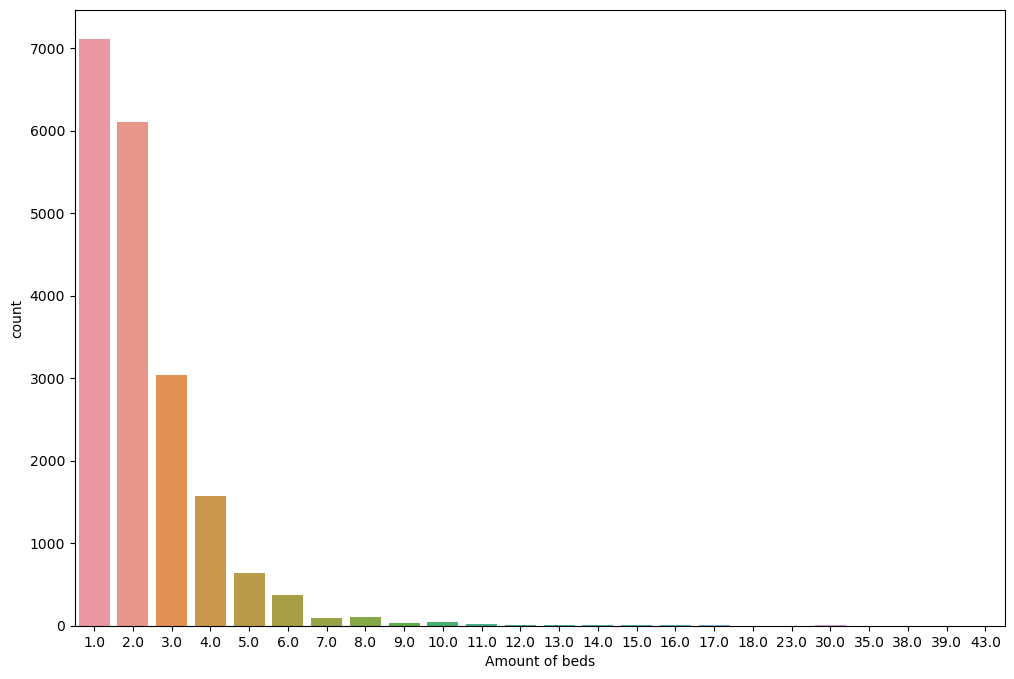

In [83]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='beds', data=detailed_listings)
ax.set_xlabel('Amount of beds')
plt.show()

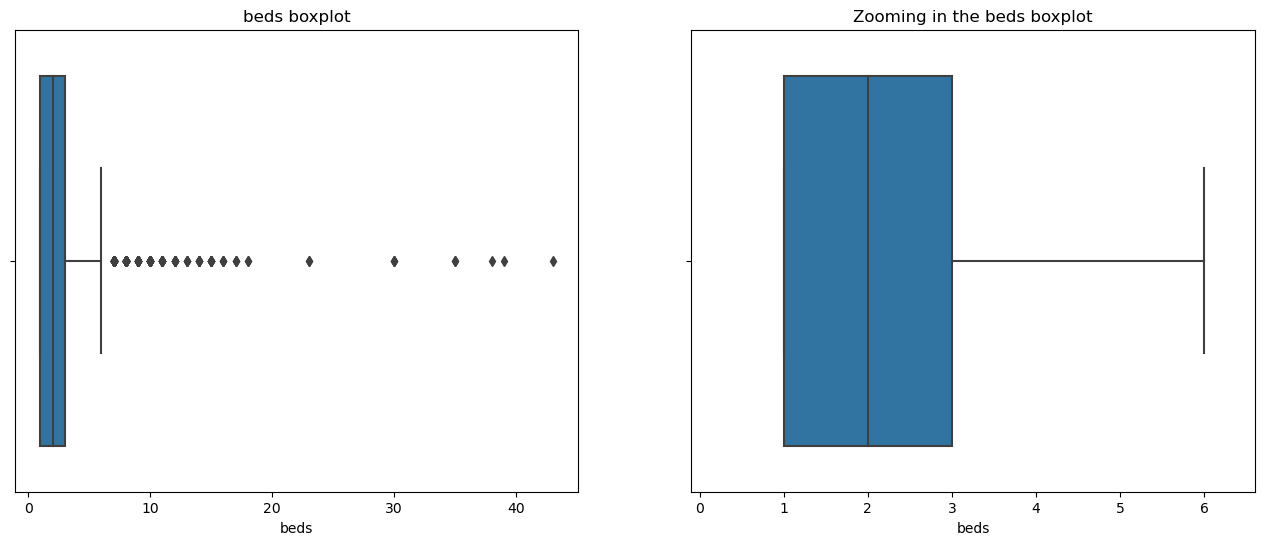

In [84]:
box_plot('beds')

In [85]:
get_max_fence('beds')

6.0

In [86]:
rows_before = detailed_listings.shape[0]
detailed_listings = detailed_listings[detailed_listings['beds'] <= get_max_fence('beds')]
print(f'{rows_before-detailed_listings.shape[0]} rows were removed')

585 rows were removed


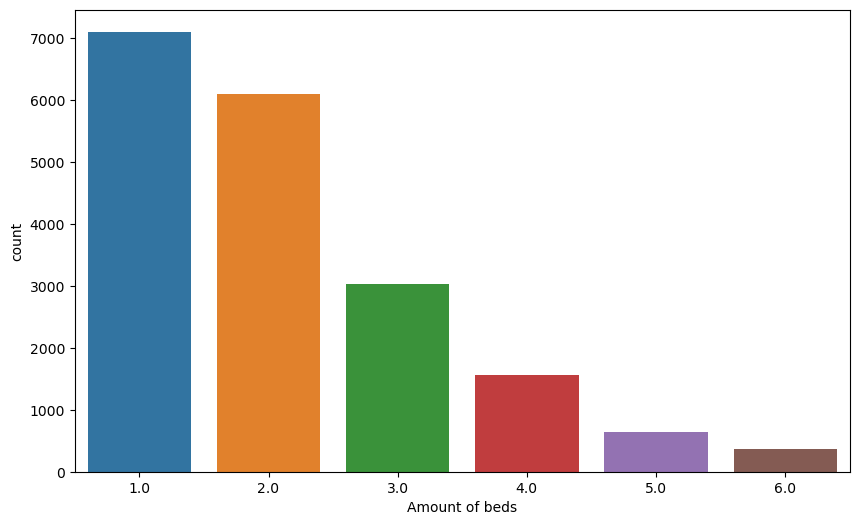

In [87]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='beds', data=detailed_listings)
ax.set_xlabel('Amount of beds')
plt.show()

<Axes: >

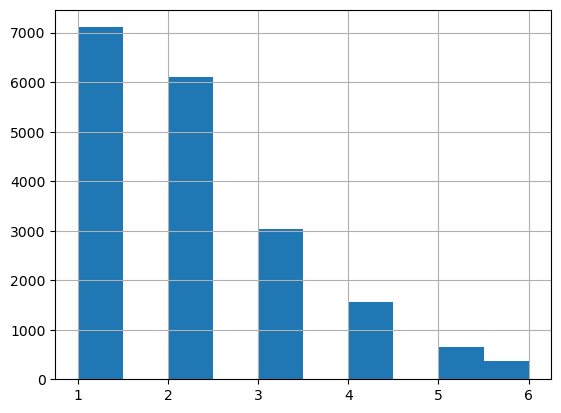

In [88]:
detailed_listings.beds.hist()

In [89]:
beds_skewness = skew(detailed_listings.beds)
beds_skewness

1.1397977881189671

<Axes: xlabel='beds', ylabel='Density'>

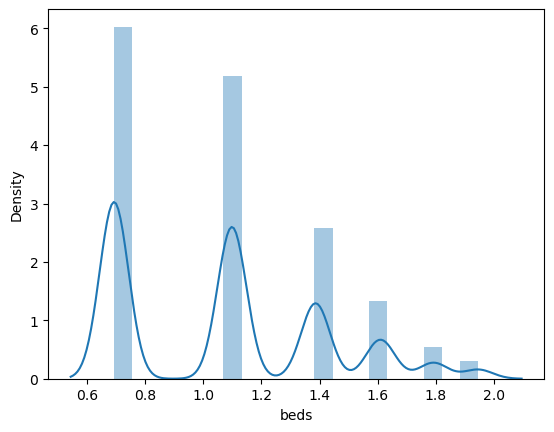

In [90]:
detailed_listings['beds'] = [math.log1p(d) for d in detailed_listings.beds]
sns.distplot(detailed_listings.beds, bins = 20)

In [91]:
beds_skewness = skew(detailed_listings.beds)
beds_skewness

0.48956370195429255

Cleaning and Transforming <b>minimum_nights and maximum_nights</b> column

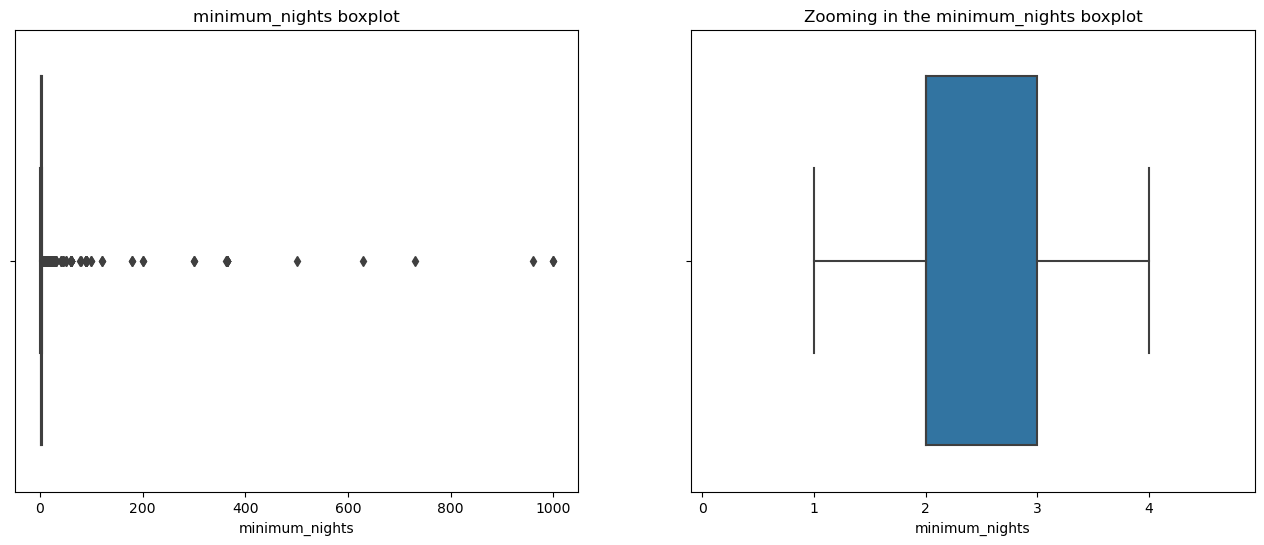

In [92]:
box_plot('minimum_nights')

In [93]:
get_max_fence('minimum_nights')

4.5

In [94]:
rows_before = detailed_listings.shape[0]
detailed_listings = detailed_listings[detailed_listings['minimum_nights'] <= get_max_fence('minimum_nights')]
print(f'{rows_before-detailed_listings.shape[0]} rows were removed')

2158 rows were removed


<Axes: xlabel='minimum_nights', ylabel='Density'>

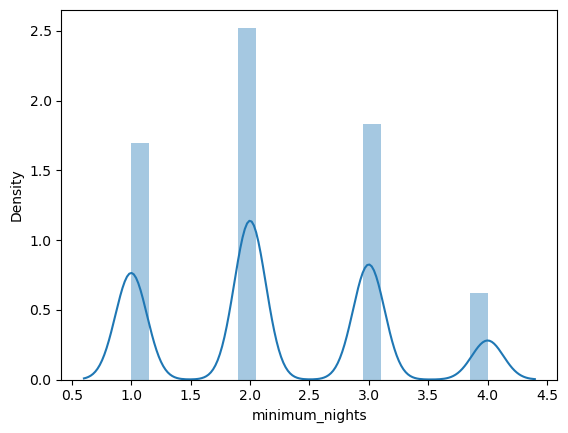

In [95]:
sns.distplot(detailed_listings.minimum_nights, bins = 20)

In [96]:
minimum_nights_skewness = skew(detailed_listings.minimum_nights)
minimum_nights_skewness

0.282746678410674

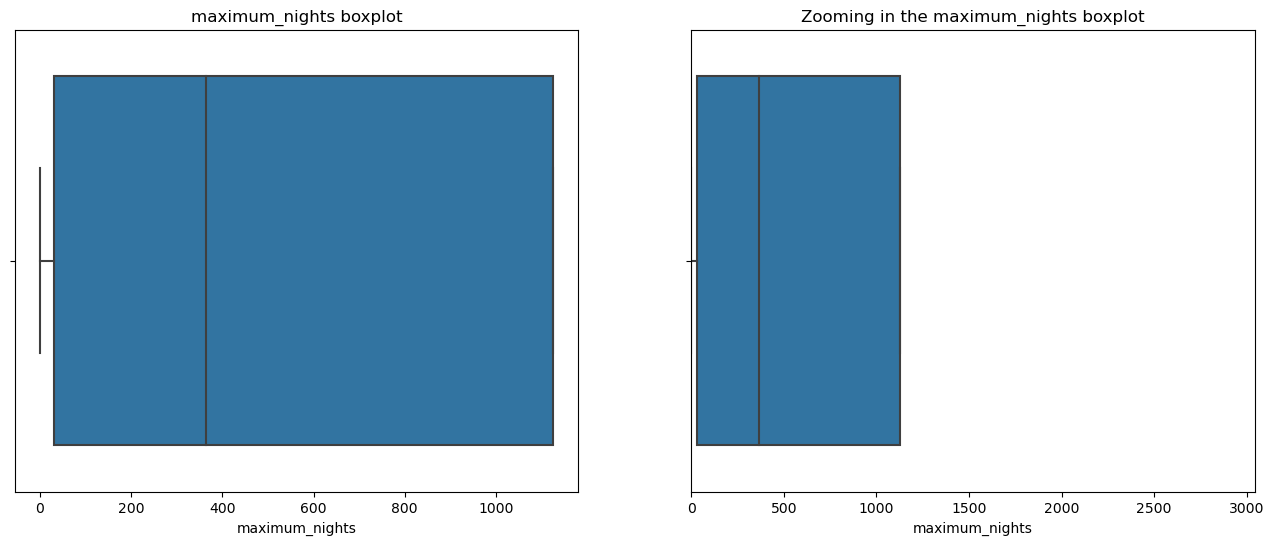

In [97]:
box_plot('maximum_nights')

In [98]:
get_max_fence('maximum_nights')

2767.5

In [99]:
detailed_listings.maximum_nights.describe()

count    16672.000000
mean       476.968990
std        465.032195
min          1.000000
25%         30.000000
50%        365.000000
75%       1125.000000
max       1125.000000
Name: maximum_nights, dtype: float64

0.5185950321907743

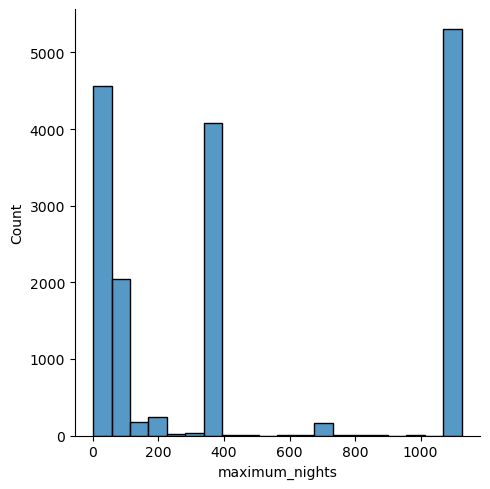

In [100]:
sns.displot(detailed_listings.maximum_nights, bins =20)
max_nights_skewness = skew(detailed_listings.maximum_nights)
max_nights_skewness

Dropping highly correlated columns

In [101]:
cols_to_drop = ['minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm']
detailed_listings.drop(columns = cols_to_drop, axis= 1, inplace = True)

In [102]:
availability_30_skewness = skew(detailed_listings.availability_30)
availability_60_skewness = skew(detailed_listings.availability_60)
availability_90_skewness = skew(detailed_listings.availability_90)
availability_365_skewness = skew(detailed_listings.availability_365)
print("Printing skewness for avail_30, avail_90 and avail_365 respectively: ", availability_30_skewness,availability_60_skewness,availability_90_skewness,availability_365_skewness)
print("Correlation bet. avail_30 and avail_60: ",detailed_listings.availability_30.corr(detailed_listings.availability_60))
print("Correlation bet. avail_30 and avail_60: ",detailed_listings.availability_60.corr(detailed_listings.availability_90))

Printing skewness for avail_30, avail_90 and avail_365 respectively:  0.19721463913056522 0.04493647741246488 -0.24074436341979932 0.20077092494184226
Correlation bet. avail_30 and avail_60:  0.9400434142506913
Correlation bet. avail_30 and avail_60:  0.9517315774455255


In [103]:
cols_to_drop = ['availability_30','availability_90']
detailed_listings.drop(columns = cols_to_drop, axis = 1, inplace = True)

Cleaning and Transforming <b>number_of_reviews</b> related columns

In [104]:
detailed_listings[['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d']].describe()

number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d
count       16672.000000           16672.000000            16672.000000
mean           30.349808              11.158769                0.696497
std            50.258412              13.614403                1.276069
min             1.000000               0.000000                0.000000
25%             3.000000               2.000000                0.000000
50%            11.000000               6.000000                0.000000
75%            35.000000              16.000000                1.000000
max           638.000000             124.000000               14.000000

83.0

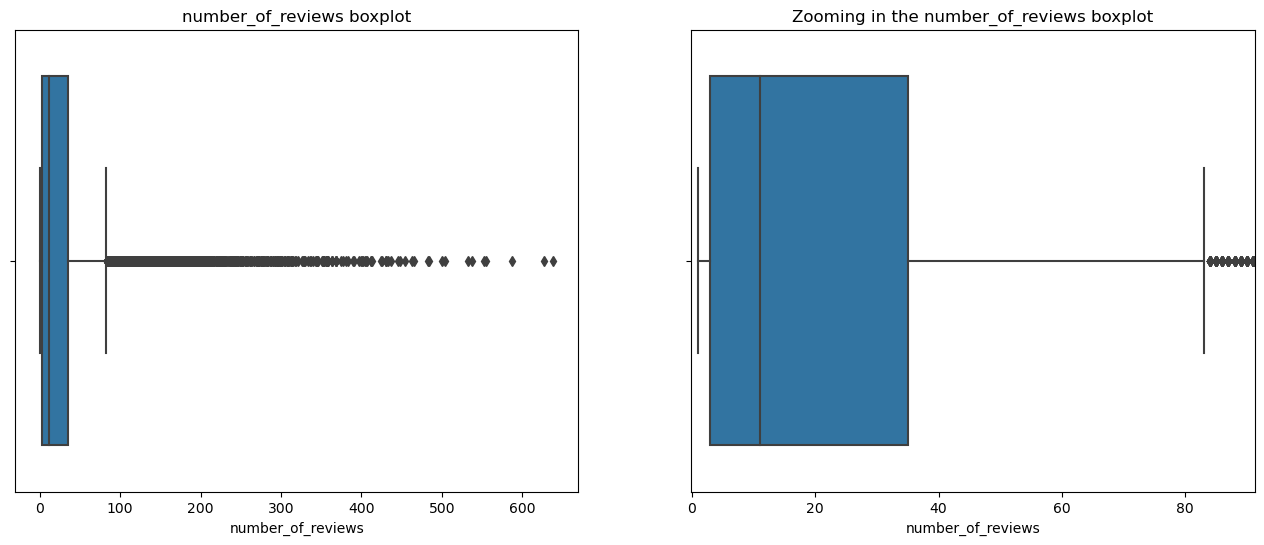

In [105]:
box_plot('number_of_reviews')
get_max_fence('number_of_reviews')

<Axes: xlabel='number_of_reviews', ylabel='Density'>

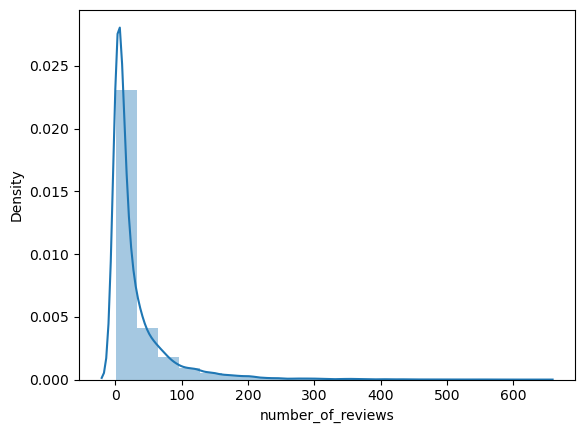

In [106]:
sns.distplot(detailed_listings.number_of_reviews, bins = 20)

In [107]:
get_max_fence('number_of_reviews')

83.0

In [108]:
rows_before = detailed_listings.shape[0]
detailed_listings = detailed_listings[detailed_listings['number_of_reviews'] <= get_max_fence('number_of_reviews')]
print(f'{rows_before-detailed_listings.shape[0]} rows were removed')

1571 rows were removed


<Axes: xlabel='number_of_reviews', ylabel='Density'>

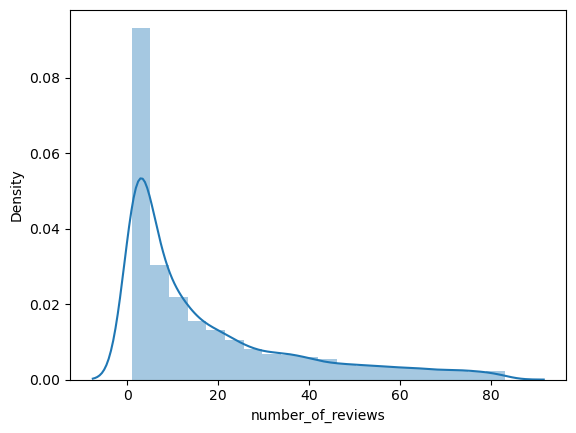

In [109]:
sns.distplot(detailed_listings.number_of_reviews, bins = 20)

In [110]:
import math

<Axes: xlabel='number_of_reviews', ylabel='Density'>

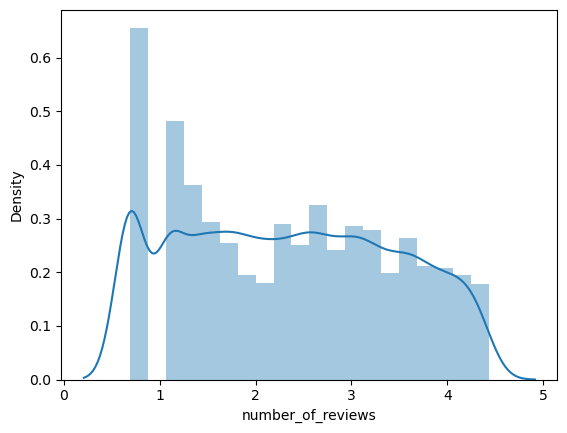

In [111]:
detailed_listings['number_of_reviews'] = [math.log1p(d) for d in detailed_listings.number_of_reviews]
sns.distplot(detailed_listings['number_of_reviews'], bins = 20)

In [112]:
#dropping 'nubmer_of_reviews_ltm' because of high correlation
print(detailed_listings.number_of_reviews.corr(detailed_listings.number_of_reviews_ltm))
cols_to_drop =['number_of_reviews_ltm']
detailed_listings.drop(columns = cols_to_drop, axis =1, inplace = True)

0.7165441586908633


In [113]:
print(detailed_listings.number_of_reviews.corr(detailed_listings.number_of_reviews_l30d))
detailed_listings.drop(columns = ['number_of_reviews_l30d'],axis = 1, inplace = True)

0.3582051510701125


Dropping more correlated columns

In [114]:
correlation = detailed_listings['host_listings_count'].corr(detailed_listings['calculated_host_listings_count'])
print("Correlation between 'host_listings_count' and 'calculated_host_listings_count':", correlation)

Correlation between 'host_listings_count' and 'calculated_host_listings_count': 0.7809782326994213


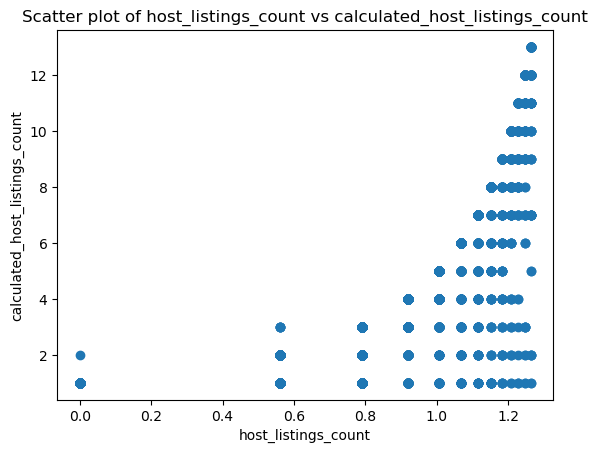

In [115]:
import matplotlib.pyplot as plt

plt.scatter(detailed_listings['host_listings_count'], detailed_listings['calculated_host_listings_count'])
plt.xlabel('host_listings_count')
plt.ylabel('calculated_host_listings_count')
plt.title('Scatter plot of host_listings_count vs calculated_host_listings_count')
plt.show()


In [116]:
cols_to_drop =['calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']
detailed_listings.drop(columns = cols_to_drop, axis = 1, inplace = True)

In [117]:
correlation = detailed_listings['review_scores_rating'].corr(detailed_listings['review_scores_value'])
print("Correlation between 'review_scores_rating' and 'review_scores_value':", correlation)

Correlation between 'review_scores_rating' and 'review_scores_value': 0.8110519595531096


In [118]:
cols_to_drop = ['review_scores_value', 'review_scores_accuracy']
detailed_listings.drop(columns = cols_to_drop, axis =1, inplace = True)

Cleaning and transforming <b>host_response</b> related columns

### Correct the data format 
* Transform the data type of the <b>"first_review," "last_review," and "host_since"</b> columns from string to a numerical representation indicating the number of days until the respective event.

* Transform the data type of <b>"host_response_rate"</b> to int.

In [119]:
def days_since(date):
    """
    return the number of days since respective event
    """
    try:
        date_format = "%Y-%m-%d"
        current_time = datetime.now()
        d = datetime.strptime(date, date_format)
        return abs((current_time - d).days)
    except:
        return date

In [120]:
detailed_listings = detailed_listings.dropna(subset =['host_response_time'], axis = 0)

In [121]:
#before transforming
detailed_listings.host_since.head()

8     2011-09-06
11    2011-09-11
20    2011-09-25
24    2011-04-23
32    2010-09-21
Name: host_since, dtype: object

In [122]:
#after transforming
detailed_listings.host_since.apply(lambda x: days_since(x)).head()

8     4582
11    4577
20    4563
24    4718
32    4932
Name: host_since, dtype: int64

In [123]:
detailed_listings['first_review']= detailed_listings.first_review.apply(lambda x: days_since(x))
detailed_listings['last_review']= detailed_listings.last_review.apply(lambda x: days_since(x))
detailed_listings['host_since']= detailed_listings.host_since.apply(lambda x: days_since(x))

In [124]:
detailed_listings[['first_review','last_review','host_since']].describe()

first_review   last_review    host_since
count  14148.000000  14148.000000  14148.000000
mean     958.182358    253.894897   2311.002050
std      927.018539    378.284437   1198.889257
min       85.000000     85.000000    100.000000
25%      327.000000    109.000000   1285.750000
50%      565.000000    124.000000   2491.500000
75%     1487.000000    195.000000   3210.000000
max     4763.000000   4414.000000   5473.000000

Looking at the metrics, we are better off <b>first_review and last_review</b> columns

In [125]:
cols_to_drop=['first_review', 'last_review']
detailed_listings.drop(columns = cols_to_drop, axis =1, inplace = True)

In [126]:
def transform_response_rate(x):
    """
    eliminating the "%" at the end of response rate value
    and returning it into float
    """
    try:
        return float(str(x[:-1]))/100
    except:
        return x

In [127]:
#before
detailed_listings.host_response_rate.head()

8      90%
11    100%
20    100%
24    100%
32    100%
Name: host_response_rate, dtype: object

In [128]:
#after
detailed_listings.host_response_rate = detailed_listings.host_response_rate.apply(lambda x: transform_response_rate(x))
detailed_listings.host_acceptance_rate = detailed_listings.host_acceptance_rate.apply(lambda x: transform_response_rate(x))
print(detailed_listings.host_response_rate.head())
detailed_listings.host_acceptance_rate .head()

8     0.9
11    1.0
20    1.0
24    1.0
32    1.0
Name: host_response_rate, dtype: float64


8     1.00
11    0.40
20    0.77
24    0.92
32    1.00
Name: host_acceptance_rate, dtype: float64

Let's handle remaining columns with missing values

In [129]:
detailed_listings.isnull().sum()

host_since                       0
host_response_time               0
host_response_rate               0
host_acceptance_rate           154
host_is_superhost                0
host_listings_count              0
host_identity_verified           0
neighbourhood_cleansed           0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms_text                   8
beds                             0
price                            0
minimum_nights                   0
maximum_nights                   0
availability_60                  0
availability_365                 0
number_of_reviews                0
review_scores_rating             0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_location           0
instant_bookable                 0
reviews_per_month                0
has_neighborhood_inf

In [130]:
#imputing mean in host_acceptance_rate
rate_cols = ['host_acceptance_rate']
fill_mean =  lambda col: col.fillna(col.mean())
detailed_listings[rate_cols] = detailed_listings[rate_cols].apply(fill_mean, axis = 0)

In [131]:
#Remaining object columns
categorical_cols = detailed_listings.select_dtypes(include =['object'])

In [132]:
categorical_cols.isnull().sum()

host_response_time        0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms_text            8
dtype: int64

In [133]:
detailed_listings = detailed_listings.dropna(subset = 'bathrooms_text', axis =0)

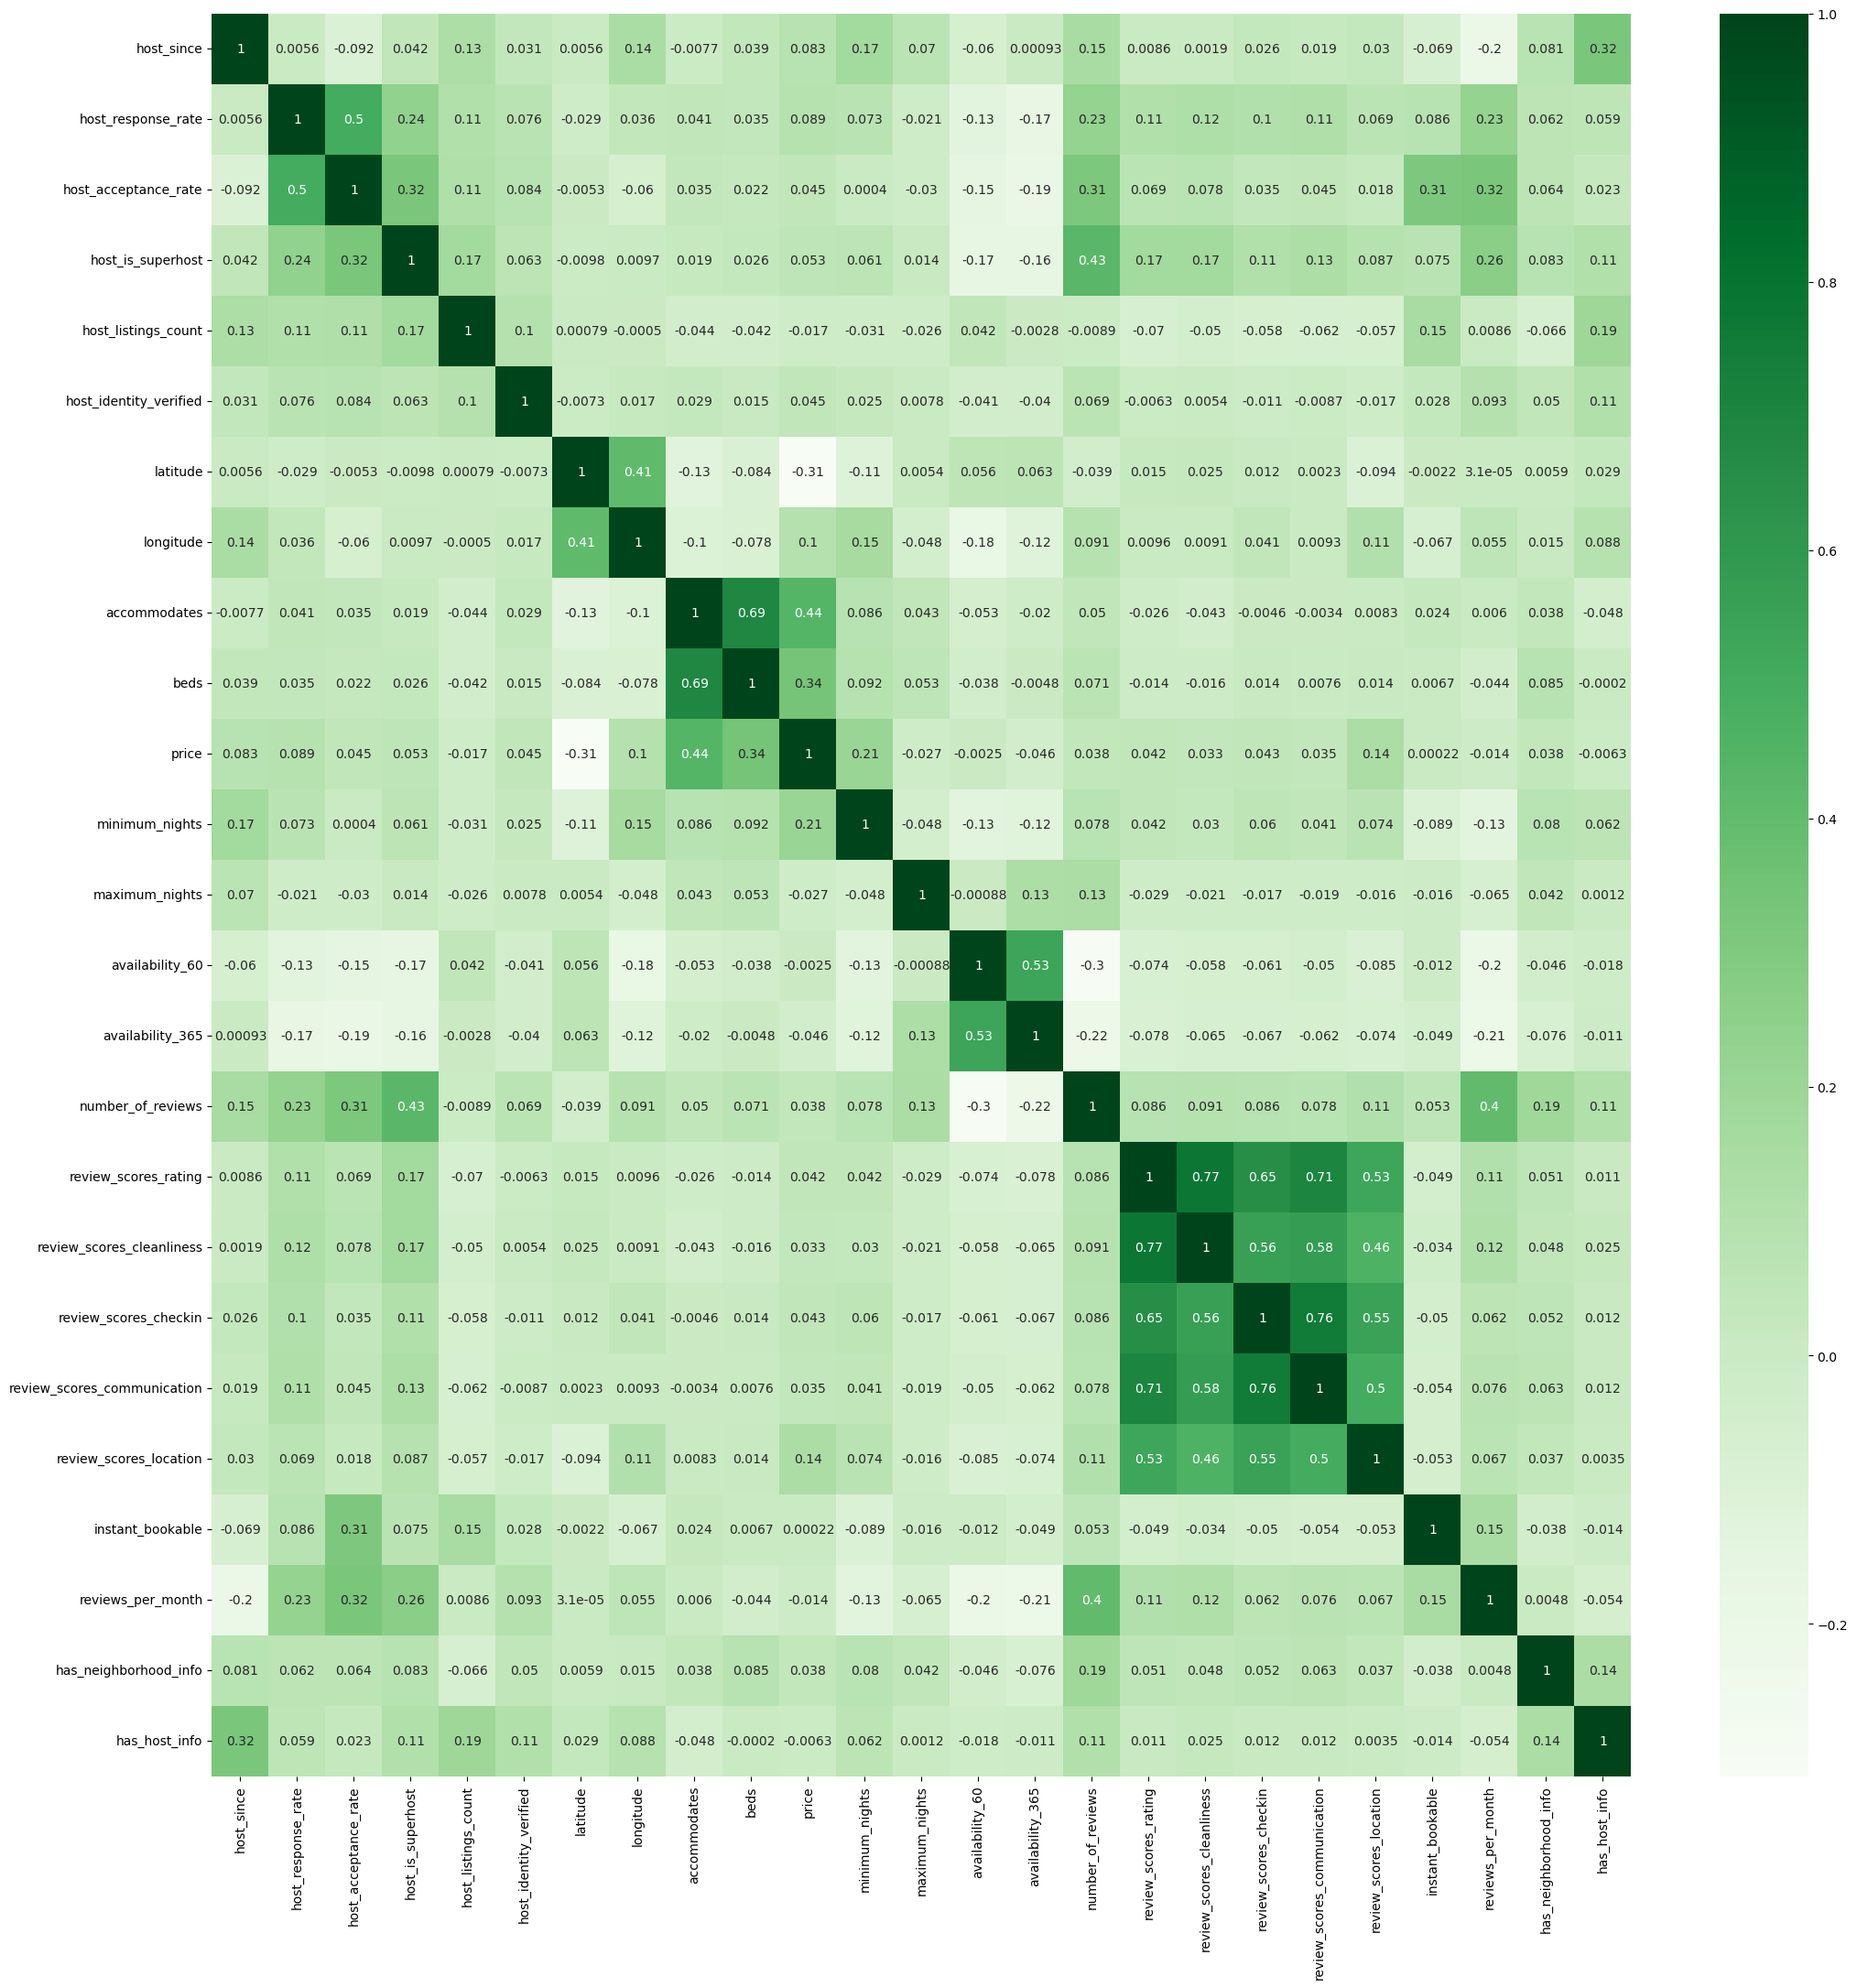

In [134]:
detailed_listings.head()
corr = detailed_listings.corr()
plt.figure(figsize=(25,25))
_ = sns.heatmap(detailed_listings.corr(), annot=True, cmap='Greens')

### Transform remaining object columns to one hot encoding by creating dummy variables

In [135]:
def create_dummy(df, cat_cols, dummy_na):
    
    """
    Return numerical dataframe after transforming categorical columns
    """
    
    for col in cat_cols:
        try:
            df = pd.concat([df.drop(col, axis =1),pd.get_dummies(df[col], prefix = col, prefix_sep = '_', drop_first= True, dummy_na = dummy_na)], axis =1)
        except:
            continue
    return df

In [136]:
cat_cols = detailed_listings.select_dtypes(include =['object'])
cat_cols

host_response_time neighbourhood_cleansed                property_type  \
8      within a few hours            Laranjeiras  Private room in rental unit   
11     within a few hours                 Tijuca  Private room in rental unit   
20     within a few hours             Copacabana           Entire rental unit   
24         within an hour                 Leblon  Private room in rental unit   
32         within an hour             Copacabana           Entire rental unit   
...                   ...                    ...                          ...   
35705      within an hour                   Leme            Entire guesthouse   
35755  within a few hours        Barra da Tijuca  Private room in rental unit   
35877      within an hour             Copacabana           Entire rental unit   
35995      within an hour        Barra da Tijuca           Entire rental unit   
35999      within an hour        Barra da Tijuca           Entire rental unit   

             room_type  bathrooms_text  
8         Private room   1 shared bath  
11        Private room  1 private bath  
20     Entire home/apt          1 bath  
24        Private room   1 shared bath  
32     Entire home/apt          1 bath  
...                ...             ...  
35705  Entire home/apt          1 bath  
35755     Private room          1 bath  
35877  Entire home/apt          1 bath  
35995  Entire home/apt          1 bath  
35999  Entire home/apt          1 bath  

[14140 rows x 5 columns]

In [137]:
print("No. of columns before handling categorical variables: ", detailed_listings.shape[1])
detailed_listings_categorized = create_dummy(detailed_listings, cat_cols, dummy_na = False)
print("No. of columns after handling categorical variables: ", detailed_listings_categorized.shape[1])

No. of columns before handling categorical variables:  30
No. of columns after handling categorical variables:  85


In [138]:
#final dataframe before going into scaling and splitting
detailed_listings_categorized.shape

(14140, 85)

## Feature Scaling 

* To enhance the numerical stability of our model and facilitate smoother convergence during the training process, we will preprocess our data by scaling it before fitting it to the model.

### we will use standard scaler for price prediction using regression methods

In [139]:
from scipy.stats import boxcox

#create a separate dataframe for scaled data.
detailed_listings_scaled = pd.DataFrame(data = detailed_listings_categorized)

#Separating features and target variable.
X = detailed_listings_scaled.drop('price', axis = 1)
Y = detailed_listings_scaled.price

#stabalize positively skewed target variable
Y = boxcox(Y)[0]

#splitting into train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [140]:
#using Standard scaler to fit and transform X_train and transform X_test with training set metric values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [141]:
##fix the positive skew of price column
#from scipy.stats import boxcox
#y_train_bc = boxcox(y_train)
#y_test_bc = boxcox(y_test)

boxcox gives two outputs, let's separate our arrays from lamda

In [142]:
##separating arrays and lamda
#
##for train
#y_train_bc = y_train_bc[0]
#lam_train = y_train_bc[1]
#
##for test
#y_test_bc = y_test_bc[0]
#lam_test = y_test_bc[1]

In [143]:
#imports necessary models library
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor 

In [144]:
#models evaluation
def evaluate(model_name, y_test, predictions):
    RMSE = np.sqrt(mean_squared_error(y_test, predictions))
    MAE = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return f'model: {model_name}\nMean Absolute Error: {MAE}\nRoot Mean Square Error: {RMSE}\nR² Score: {round(r2*100, 2)}% \n--------------------------------------------'   

In [145]:
models = {'Random Forest':RandomForestRegressor(),
          'Lasso':Lasso(),
          'ElasticNet': ElasticNet(),
          'XGBRegressor': XGBRegressor(),
          'Linear Regression': LinearRegression(),
          'Linear SVR': LinearSVR(),
          'sgdregressor' : SGDRegressor(),
          'decision tree': DecisionTreeRegressor(),
          'Extra Tree Regressor': ExtraTreesRegressor()
}


for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(evaluate(name, y_test, predictions))

model: Random Forest
Mean Absolute Error: 2.102622860188619
Root Mean Square Error: 2.696855087903623
R² Score: 56.33% 
--------------------------------------------
model: Lasso
Mean Absolute Error: 2.9537914014967814
Root Mean Square Error: 3.6167535938111777
R² Score: 21.46% 
--------------------------------------------
model: ElasticNet
Mean Absolute Error: 2.7403219682677915
Root Mean Square Error: 3.368943077385059
R² Score: 31.85% 
--------------------------------------------
model: XGBRegressor
Mean Absolute Error: 2.0903118287949587
Root Mean Square Error: 2.707412014036076
R² Score: 55.99% 
--------------------------------------------
model: Linear Regression
Mean Absolute Error: 2.1712161407345505
Root Mean Square Error: 2.7671947261492646
R² Score: 54.02% 
--------------------------------------------
model: Linear SVR
Mean Absolute Error: 2.169639706259966
Root Mean Square Error: 2.779468967298653
R² Score: 53.61% 
--------------------------------------------
model: sgdregre

* Random Forest model performed the best out of all above.
* Though we can we see our models didn't explain much variability
* Lots of room for improvement, but at the same time, it could be the bad data as well.


### lets see the features which contributes the more to price and then we will move clustering.

In [146]:
#lets take random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(evaluate('Random Forest', y_test, predictions))

model: Random Forest
Mean Absolute Error: 2.096025806704664
Root Mean Square Error: 2.6980708310041046
R² Score: 56.29% 
--------------------------------------------


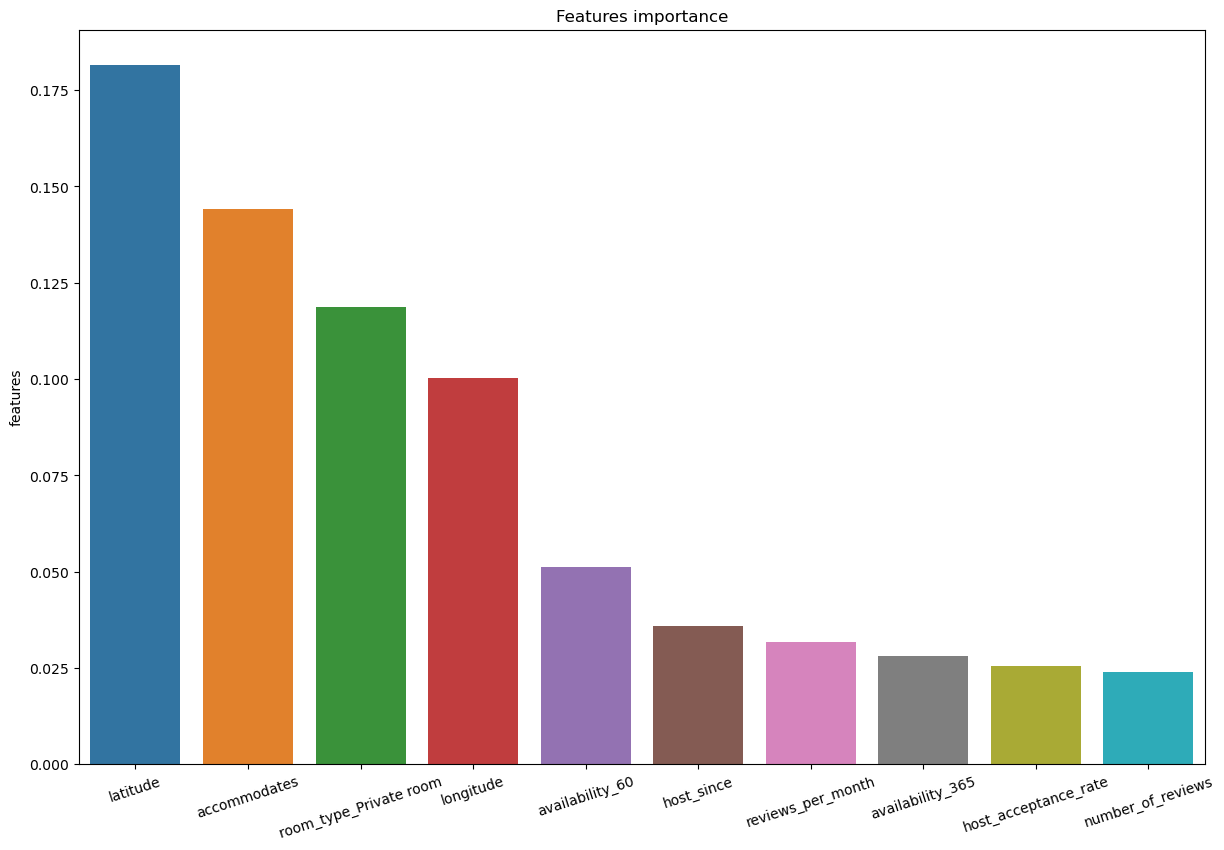

In [147]:
#plot feature importance

fig, ax = plt.subplots(figsize = (12,8))
X_test_df = pd.DataFrame(X_test, columns = X.columns)
barplot_df = pd.DataFrame({'features': model.feature_importances_}, index=X_test_df.columns)
barplot_df = barplot_df.sort_values(by='features', ascending=False)
barplot_df = barplot_df.iloc[:10]
ax.tick_params(axis='x', rotation=18)
plt.tight_layout()  # Adjust layout to prevent overlapping
ax.set_title('Features importance')
sns.barplot(x=barplot_df.index, y='features', data=barplot_df, ax = ax);

* As evident, the most influential factor impacting price is the location, which comes as no surprise. 
* Following closely is the number of occupants, and subsequently, the room type.

## Conclusion

### What is the most expensive month to visit Rio de Janeiro?
* Analysis of curve shows that listings price soars up during end of year, considering the new year.
* Probably because of the availability of house drops by huge margin which is in inverse relation with price
 shown by graph.

### Most and least expensive Neighbourhood in Rio de Janeiro?
* The most expensive Rio Neighbourhood is São Cristóvão , followed by Estácio and Joá shown by raw data graph.


### What are the factors associated with price of listings?
* Location (Latitude)
* Number of peopel (accomodates)
* Room Type (private room)

# Conducting another EDA for regression on better RIO Airbnb dataset


* Following content on notebook, I will be conducting an exploratory data analysis (EDA) using a newly acquired dataset that offers significant improvements over the previous data used in a prior analysis. The previous dataset, while informative, had several limitations and inconsistencies that hindered the accuracy and depth of our analysis.

* After thorough research and data reviews on platforms like Kaggle, I was able to procure a more reliable and comprehensive [dataset](https://www.kaggle.com/datasets/allanbruno/airbnb-rio-de-janeiro/data) for the same analysis. This new dataset not only addresses the shortcomings of the previous data but also provides additional insights and features that were previously unavailable.

* The objective of this analysis remains unchanged: to uncover factors influencing prices of listings, our 3rd question of interest. However, with the improved dataset, we expect to gain more accurate and actionable insights.

In [148]:
df = pd.read_csv('data/total_data.csv')
df.head()

Unnamed: 0     id                         listing_url     scrape_id  \
0         0.0  17878  https://www.airbnb.com/rooms/17878  2.018082e+13   
1         1.0  24480  https://www.airbnb.com/rooms/24480  2.018082e+13   
2         2.0  25026  https://www.airbnb.com/rooms/25026  2.018082e+13   
3         3.0  31560  https://www.airbnb.com/rooms/31560  2.018082e+13   
4         4.0  35636  https://www.airbnb.com/rooms/35636  2.018082e+13   

  last_scraped                                       name  \
0   2018-08-16          Very Nice 2Br - Copacabana - WiFi   
1   2018-08-16           Nice and cozy near Ipanema Beach   
2   2018-08-16  Beautiful Modern Decorated Studio in Copa   
3   2018-08-16           NICE & COZY 1BDR - IPANEMA BEACH   
4   2018-08-16           Cosy flat close to Ipanema beach   

                                             summary  \
0  Please note that special rates apply for New Y...   
1  My studio is located in the best  of Ipanema. ...   
2  Our apartment is a little gem, everyone loves ...   
3  This nice and clean 1 bedroom apartment is loc...   
4  This cosy apartment  is just a few steps away ...   

                                               space  \
0  - large balcony which looks out on pedestrian ...   
1  The studio is located at Vinicius de Moraes St...   
2  This newly renovated studio (last renovations ...   
3  This nice and clean 1 bedroom apartment is loc...   
4  The location is extremely convenient, safe and...   

                                         description experiences_offered  ...  \
0  Please note that special rates apply for New Y...                none  ...   
1  My studio is located in the best  of Ipanema. ...                none  ...   
2  Our apartment is a little gem, everyone loves ...                none  ...   
3  This nice and clean 1 bedroom apartment is loc...                none  ...   
4  This cosy apartment  is just a few steps away ...                none  ...   

  minimum_minimum_nights maximum_minimum_nights minimum_maximum_nights  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

  maximum_maximum_nights minimum_nights_avg_ntm maximum_nights_avg_ntm  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

   number_of_reviews_ltm calculated_host_listings_count_entire_homes  \
0                    NaN                                         NaN   
1                    NaN                                         NaN   
2                    NaN                                         NaN   
3                    NaN                                         NaN   
4                    NaN                                         NaN   

  calculated_host_listings_count_private_rooms  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

  calculated_host_listings_count_shared_rooms  
0                                         NaN  
1                                         NaN  
2                                         NaN  
3                                         NaN  
4                                         NaN  

[5 rows x 108 columns]

* We are only going to work with chosen features which we feel have affects on price of price of listings.

In [149]:
df = pd.read_csv('data/total_data.csv', index_col=False, usecols=['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'security_deposit','cleaning_fee'])
df.head()

host_is_superhost host_listings_count   latitude  longitude property_type  \
0                 f                 2.0 -22.965919 -43.178962   Condominium   
1                 f                 1.0 -22.985698 -43.201935     Apartment   
2                 f                 3.0 -22.977117 -43.190454     Apartment   
3                 t                 1.0 -22.983024 -43.214270     Apartment   
4                 f                 1.0 -22.988165 -43.193588     Apartment   

  accommodates  bathrooms  bedrooms  beds  \
0            5        1.0       2.0   2.0   
1            2        1.0       1.0   1.0   
2            3        1.0       1.0   2.0   
3            3        1.0       1.0   2.0   
4            3        1.5       1.0   2.0   

                                           amenities    price  \
0  {TV,"Cable TV",Internet,Wifi,"Air conditioning...  $307.00   
1  {TV,"Cable TV",Wifi,"Air conditioning","First ...  $233.00   
2  {TV,"Cable TV",Internet,Wifi,"Air conditioning...  $159.00   
3  {TV,"Cable TV",Internet,Wifi,"Air conditioning...  $253.00   
4  {TV,"Cable TV",Internet,Wifi,"Air conditioning...  $350.00   

  security_deposit cleaning_fee require_guest_profile_picture  \
0            $0.00      $311.00                             f   
1          $889.00      $220.00                             f   
2        $1,000.00      $220.00                             t   
3            $0.00       $78.00                             f   
4          $971.00      $152.00                             t   

  require_guest_phone_verification  
0                                f  
1                                f  
2                                t  
3                                f  
4                                t

In [150]:
#shape of the data
print('number of rows: ', df.shape[0])
print('number of columns: ', df.shape[1])

number of rows:  784122
number of columns:  15


In [151]:
df.describe()

latitude      longitude      bathrooms       bedrooms  \
count  784121.000000  784121.000000  782628.000000  783346.000000   
mean      -22.965138     -43.253676       1.693265       1.644332   
std         0.082272       0.137738       1.224674       1.076565   
min       -23.073400     -43.738920       0.000000       0.000000   
25%       -22.984680     -43.322350       1.000000       1.000000   
50%       -22.970650     -43.200040       1.000000       1.000000   
75%       -22.945660     -43.186930       2.000000       2.000000   
max        43.000000      43.000000     200.000000      45.000000   

                beds  
count  781787.000000  
mean        2.595179  
std         2.073158  
min         0.000000  
25%         1.000000  
50%         2.000000  
75%         3.000000  
max        86.000000

### We are doing the same feature engineering as we did above, so we will go little quick from here

* As we can see, we still have some outliers but looking at the mean, quartile ranges of bathroom, bedrooms and bed, it still looks stable.

In [152]:
#datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784122 entries, 0 to 784121
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   host_is_superhost                 783736 non-null  object 
 1   host_listings_count               783736 non-null  object 
 2   latitude                          784121 non-null  float64
 3   longitude                         784121 non-null  float64
 4   property_type                     784121 non-null  object 
 5   accommodates                      784121 non-null  object 
 6   bathrooms                         782628 non-null  float64
 7   bedrooms                          783346 non-null  float64
 8   beds                              781787 non-null  float64
 9   amenities                         784121 non-null  object 
 10  price                             784121 non-null  object 
 11  security_deposit                  423058 non-null  o

* As we can notice, price, security_deposit and cleaning_fee are object data type which we need to clean later.
* Accomodates and host listing count should be int as well.

In [153]:
#number of null value in each column
df.isnull().sum()

host_is_superhost                      386
host_listings_count                    386
latitude                                 1
longitude                                1
property_type                            1
accommodates                             1
bathrooms                             1494
bedrooms                               776
beds                                  2335
amenities                                1
price                                    1
security_deposit                    361064
cleaning_fee                        269336
require_guest_profile_picture            2
require_guest_phone_verification         2
dtype: int64

Lots of missing values in security_deposit and cleaning_fee

In [154]:
total_rows = df.shape[0]
print("security_deposit missing values are in ",round(361064*100/total_rows),"% of rows, and cleaning_fee missing values are in ",round(269336*100/total_rows),"% of rows.")

security_deposit missing values are in  46 % of rows, and cleaning_fee missing values are in  34 % of rows.


As one can see, percentage of missing values in above columns, it's better to drop the whole columns.

In [155]:
# drop of security_deposit and cleaning_fee columns
cols_to_drop = ['security_deposit','cleaning_fee']
df.drop(columns = cols_to_drop, axis=1, inplace=True)
df.shape

(784122, 13)

now let's drop the rows of missing columns, which we can afford to do that as we have more than enough data for doing regression.

In [156]:
#drop missing rows
df.dropna(inplace = True)
df.shape

(780035, 13)

In [157]:
df.isnull().sum()

host_is_superhost                   0
host_listings_count                 0
latitude                            0
longitude                           0
property_type                       0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
amenities                           0
price                               0
require_guest_profile_picture       0
require_guest_phone_verification    0
dtype: int64

In [158]:
# changing data types
#host_listings_count
df['host_listings_count'] = df['host_listings_count'].astype(np.float32, copy=False)
df['host_listings_count'] = df['host_listings_count'].astype(np.int16, copy=False)
#accommodates
df['accommodates'] = df['accommodates'].astype(np.int16, copy=False)
#price
df['price'] = df['price'].str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False)
df['price'] = df['price'].astype(np.float32, copy=False)
df['price'] = df['price'].astype(np.int32, copy=False)

### quickly get rid of outliers

In [159]:
df.describe()

host_listings_count       latitude      longitude   accommodates  \
count        780035.000000  780035.000000  780035.000000  780035.000000   
mean              8.765214     -22.965265     -43.253803       4.209059   
std              49.291637       0.034895       0.097368       2.616990   
min               0.000000     -23.073400     -43.738920       1.000000   
25%               1.000000     -22.984690     -43.322400       2.000000   
50%               1.000000     -22.970670     -43.200050       4.000000   
75%               3.000000     -22.945840     -43.186930       6.000000   
max            1495.000000     -22.749704     -43.104060     160.000000   

           bathrooms       bedrooms           beds          price  
count  780035.000000  780035.000000  780035.000000  780035.000000  
mean        1.693696       1.645376       2.596939     654.627733  
std         1.219918       1.077142       2.074277    1737.875992  
min         0.000000       0.000000       0.000000       0.000000  
25%         1.000000       1.000000       1.000000     152.000000  
50%         1.000000       1.000000       2.000000     297.000000  
75%         2.000000       2.000000       3.000000     601.000000  
max       200.000000      45.000000      86.000000  138288.000000

Little changes required in above functions

In [160]:
#returns the maximum limit value, beyond which data points can be considered outliers.
def get_max_fence(column):
    qt = df[column].quantile([0.25,0.75])
    upper = qt.values[1]
    iqr = upper-qt.values[0]
    max_fence = upper + 1.5*(iqr)
    return max_fence

In [161]:
#returns two seaborn boxplots with one zoomed in around interquartile range
def box_plot(column):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(16,6)
    _ = sns.boxplot(x=df[column], ax = ax1)
    ax1.set_title(f'{column} boxplot')
    ax2.set_title(f'Zooming in the {column} boxplot')
    ax2.set_xlim((-0.1,1.1*get_max_fence(column)))
    _ = sns.boxplot(x=df[column], ax = ax2)

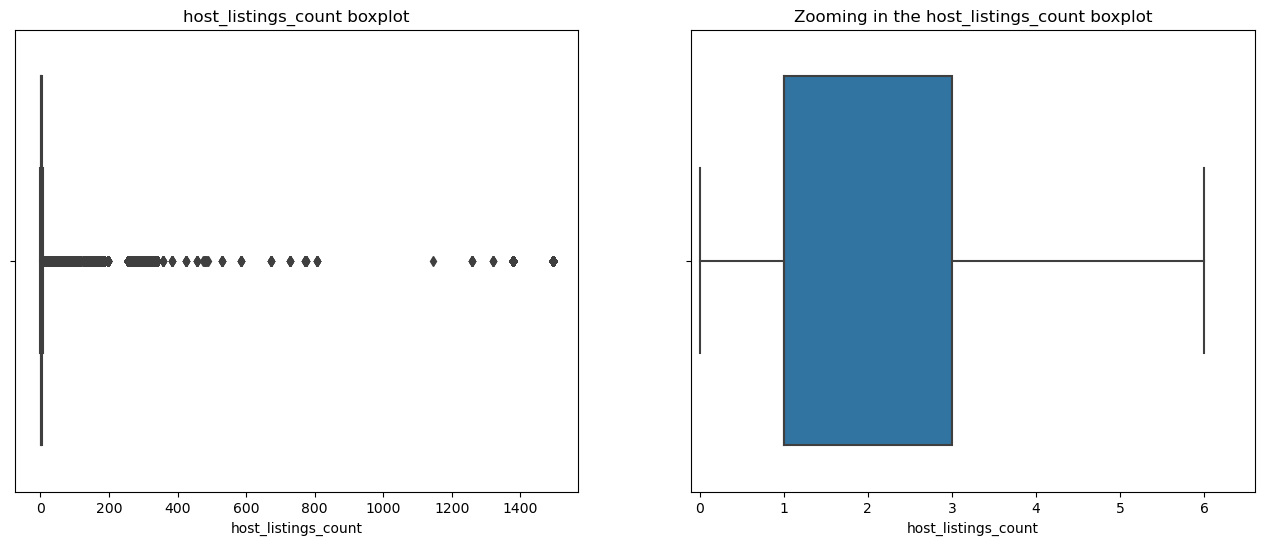

In [162]:
column ='host_listings_count'
box_plot(column)

In [163]:
rows_before = df.shape[0]
print('values exceeding: ', get_max_fence(column),' are outliers')
df = df[df['host_listings_count'] <= get_max_fence('host_listings_count')]
print(f'{rows_before- df.shape[0]} rows were deleted.')

values exceeding:  6.0  are outliers
99528 rows were deleted.


In [164]:
print('host listings count minimum value : ',df.host_listings_count.min()) #it can't be zero otherwise it wouldn't be on dataset, so we will change it to 1.
df.loc[df['host_listings_count'] == 0.0, 'host_listings_count'] = 1

host listings count minimum value :  0


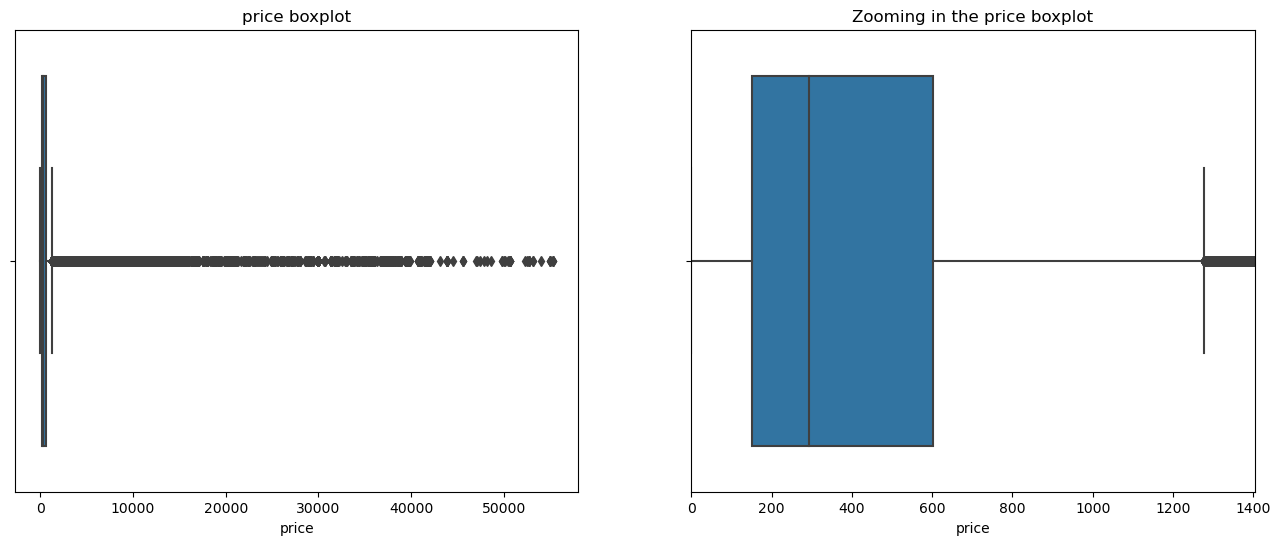

In [165]:
column = 'price'
box_plot(column)

In [166]:
rows_before = df.shape[0]
print('values exceeding: ', get_max_fence(column),' are outliers')
df = df[df['price'] <= get_max_fence('price')]
print(f'{rows_before- df.shape[0]} rows were deleted.')

values exceeding:  1276.0  are outliers
66365 rows were deleted.


<Axes: xlabel='price', ylabel='Density'>

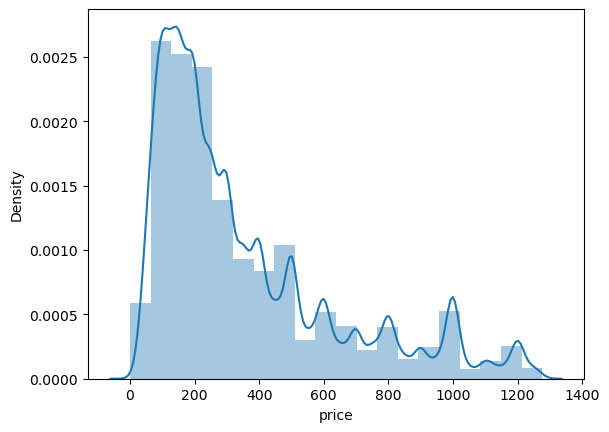

In [167]:
sns.distplot(df.price, bins = 20)

* a positive skewed target variable, which we will normalize before modeling

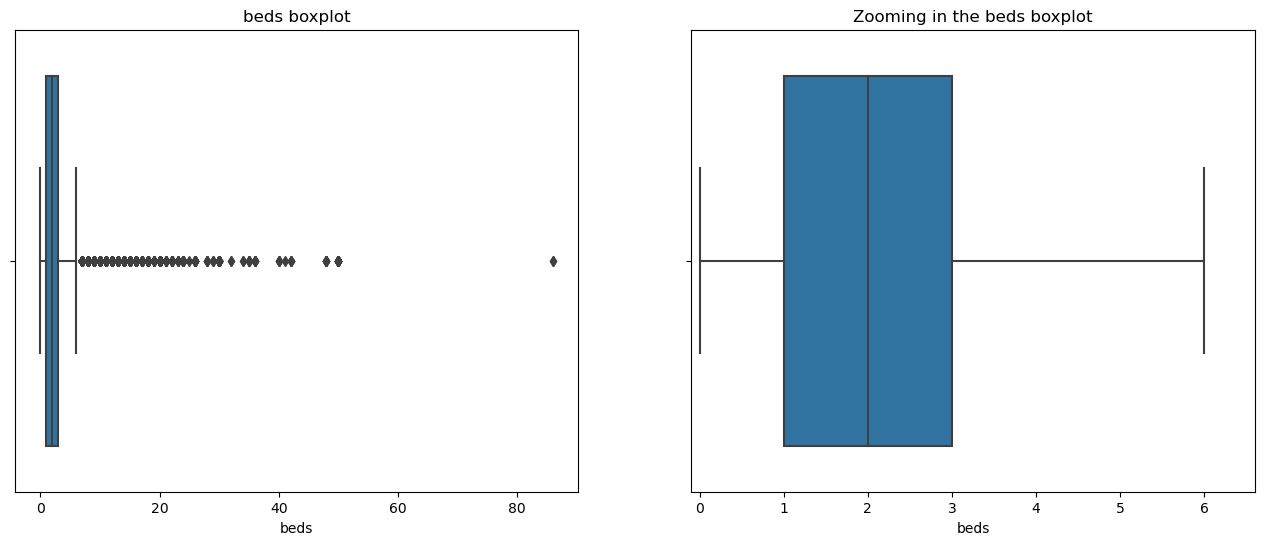

In [168]:
column = 'beds'
box_plot(column)

In [169]:
rows_before = df.shape[0]
print('values exceeding: ', get_max_fence(column),' are outliers')
df = df[df['beds'] <= get_max_fence('beds')]
print(f'{rows_before- df.shape[0]} rows were deleted.')

values exceeding:  6.0  are outliers
13846 rows were deleted.


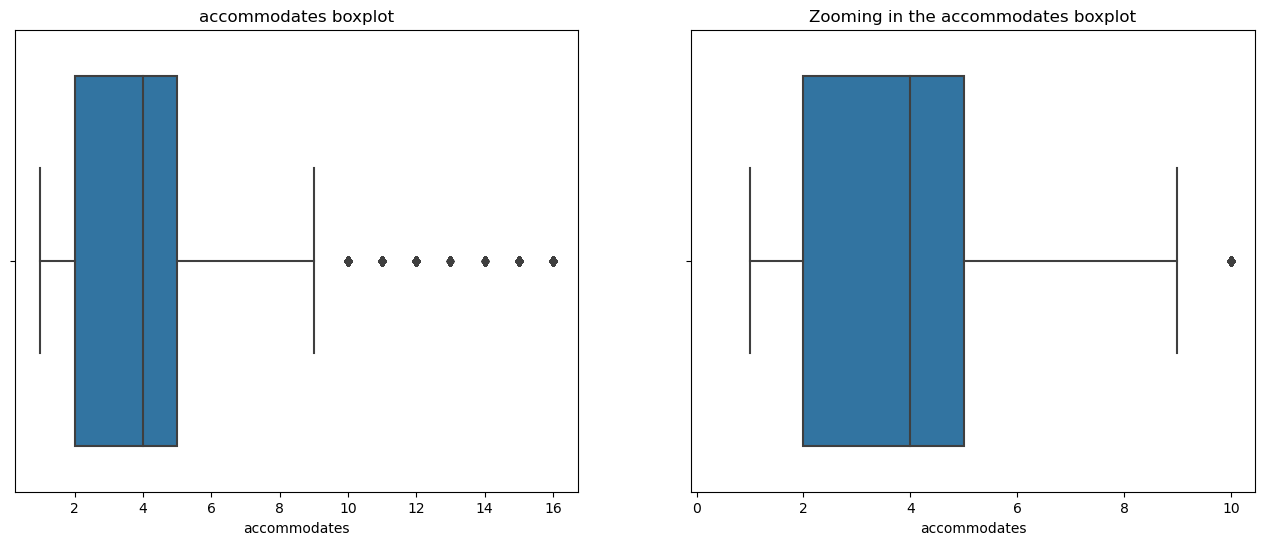

In [170]:
column = 'accommodates'
box_plot('accommodates')

In [171]:
rows_before = df.shape[0]
print('values exceeding: ', get_max_fence(column),' are outliers')
df = df[df['accommodates'] <= get_max_fence('accommodates')]
print(f'{rows_before- df.shape[0]} rows were deleted.')

values exceeding:  9.5  are outliers
6626 rows were deleted.


In [172]:
df.property_type.value_counts()

Apartment                 466187
House                      53159
Condominium                29280
Serviced apartment         12501
Loft                       12261
Guest suite                 3644
Bed and breakfast           3258
Hostel                      2521
Guesthouse                  2112
Other                       1729
Villa                       1391
Townhouse                   1016
Aparthotel                   678
Earth house                  541
Tiny house                   485
Chalet                       472
Boutique hotel               466
Hotel                        382
Casa particular (Cuba)       314
Cottage                      291
Bungalow                     209
Cabin                        128
Nature lodge                 126
Treehouse                     67
Castle                        63
Island                        60
Boat                          59
Resort                        34
Hut                           34
Campsite                      34
Dorm      

In [173]:
#feature engineering for property_type column
property_value_counts = df.property_type.value_counts()
values_to_replace = property_value_counts[property_value_counts<1000].index
df.property_type.replace(values_to_replace, 'other_types', inplace = True)
df.property_type.value_counts()

Apartment             466187
House                  53159
Condominium            29280
Serviced apartment     12501
Loft                   12261
other_types             4611
Guest suite             3644
Bed and breakfast       3258
Hostel                  2521
Guesthouse              2112
Other                   1729
Villa                   1391
Townhouse               1016
Name: property_type, dtype: int64

### There were lots of important feature in previous dataset consist of missing values and unstable data
* no. of beds
* no. of bedrooms
* no. of bathrooms
* amenities

We have decided to handle the 'amenities' column differently in this analysis. Instead of assigning unique labels to each amenity, which could lead to a cumbersome and complex representation, we will treat the column as a count of the number of amenities (n_amenities) provided in each listing. By doing so, we simplify the feature while still capturing the essence of the amenities offered by each listing. This approach allows us to retain the valuable information about amenities without introducing unnecessary complexity into our analysis.

In [174]:
df.amenities

0         {TV,"Cable TV",Internet,Wifi,"Air conditioning...
1         {TV,"Cable TV",Wifi,"Air conditioning","First ...
2         {TV,"Cable TV",Internet,Wifi,"Air conditioning...
3         {TV,"Cable TV",Internet,Wifi,"Air conditioning...
4         {TV,"Cable TV",Internet,Wifi,"Air conditioning...
                                ...                        
784115    {TV,Wifi,"Air conditioning","Free parking on p...
784116    {Wifi,Pool,Kitchen,"Paid parking off premises"...
784117    {Wifi,Kitchen,"Smoke detector","First aid kit"...
784118    {TV,Wifi,"Air conditioning",Kitchen,Elevator,E...
784119    {Wifi,Kitchen,Elevator,Washer,Essentials,Iron,...
Name: amenities, Length: 593670, dtype: object

In [175]:
df['n_amenities'] = df['amenities'].str.split(',').apply(len)+1
df['n_amenities'] = df['n_amenities'].astype('int')
df.loc[df['amenities'] == {}, 'n_amenities'] = df['n_amenities'].mode()

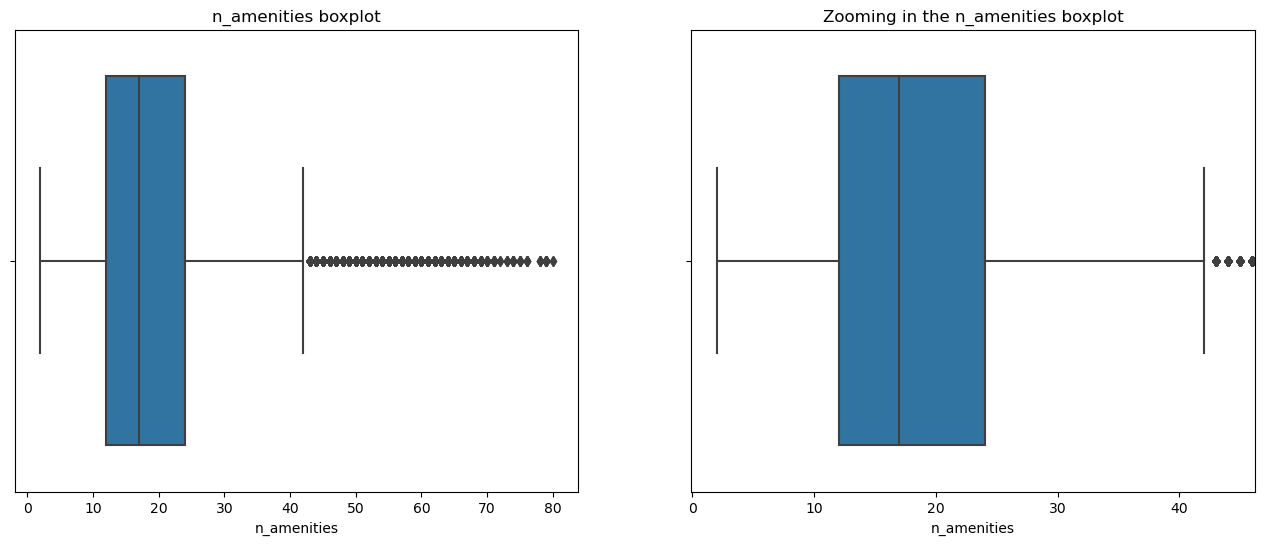

In [176]:
column = 'n_amenities'
box_plot(column)

In [177]:
rows_before = df.shape[0]
print('values exceeding: ', get_max_fence(column),' are outliers')
df = df[df['n_amenities'] <= get_max_fence('n_amenities')]
print(f'{rows_before- df.shape[0]} rows were deleted.')

values exceeding:  42.0  are outliers
17349 rows were deleted.


In [178]:
df.shape

(576321, 14)

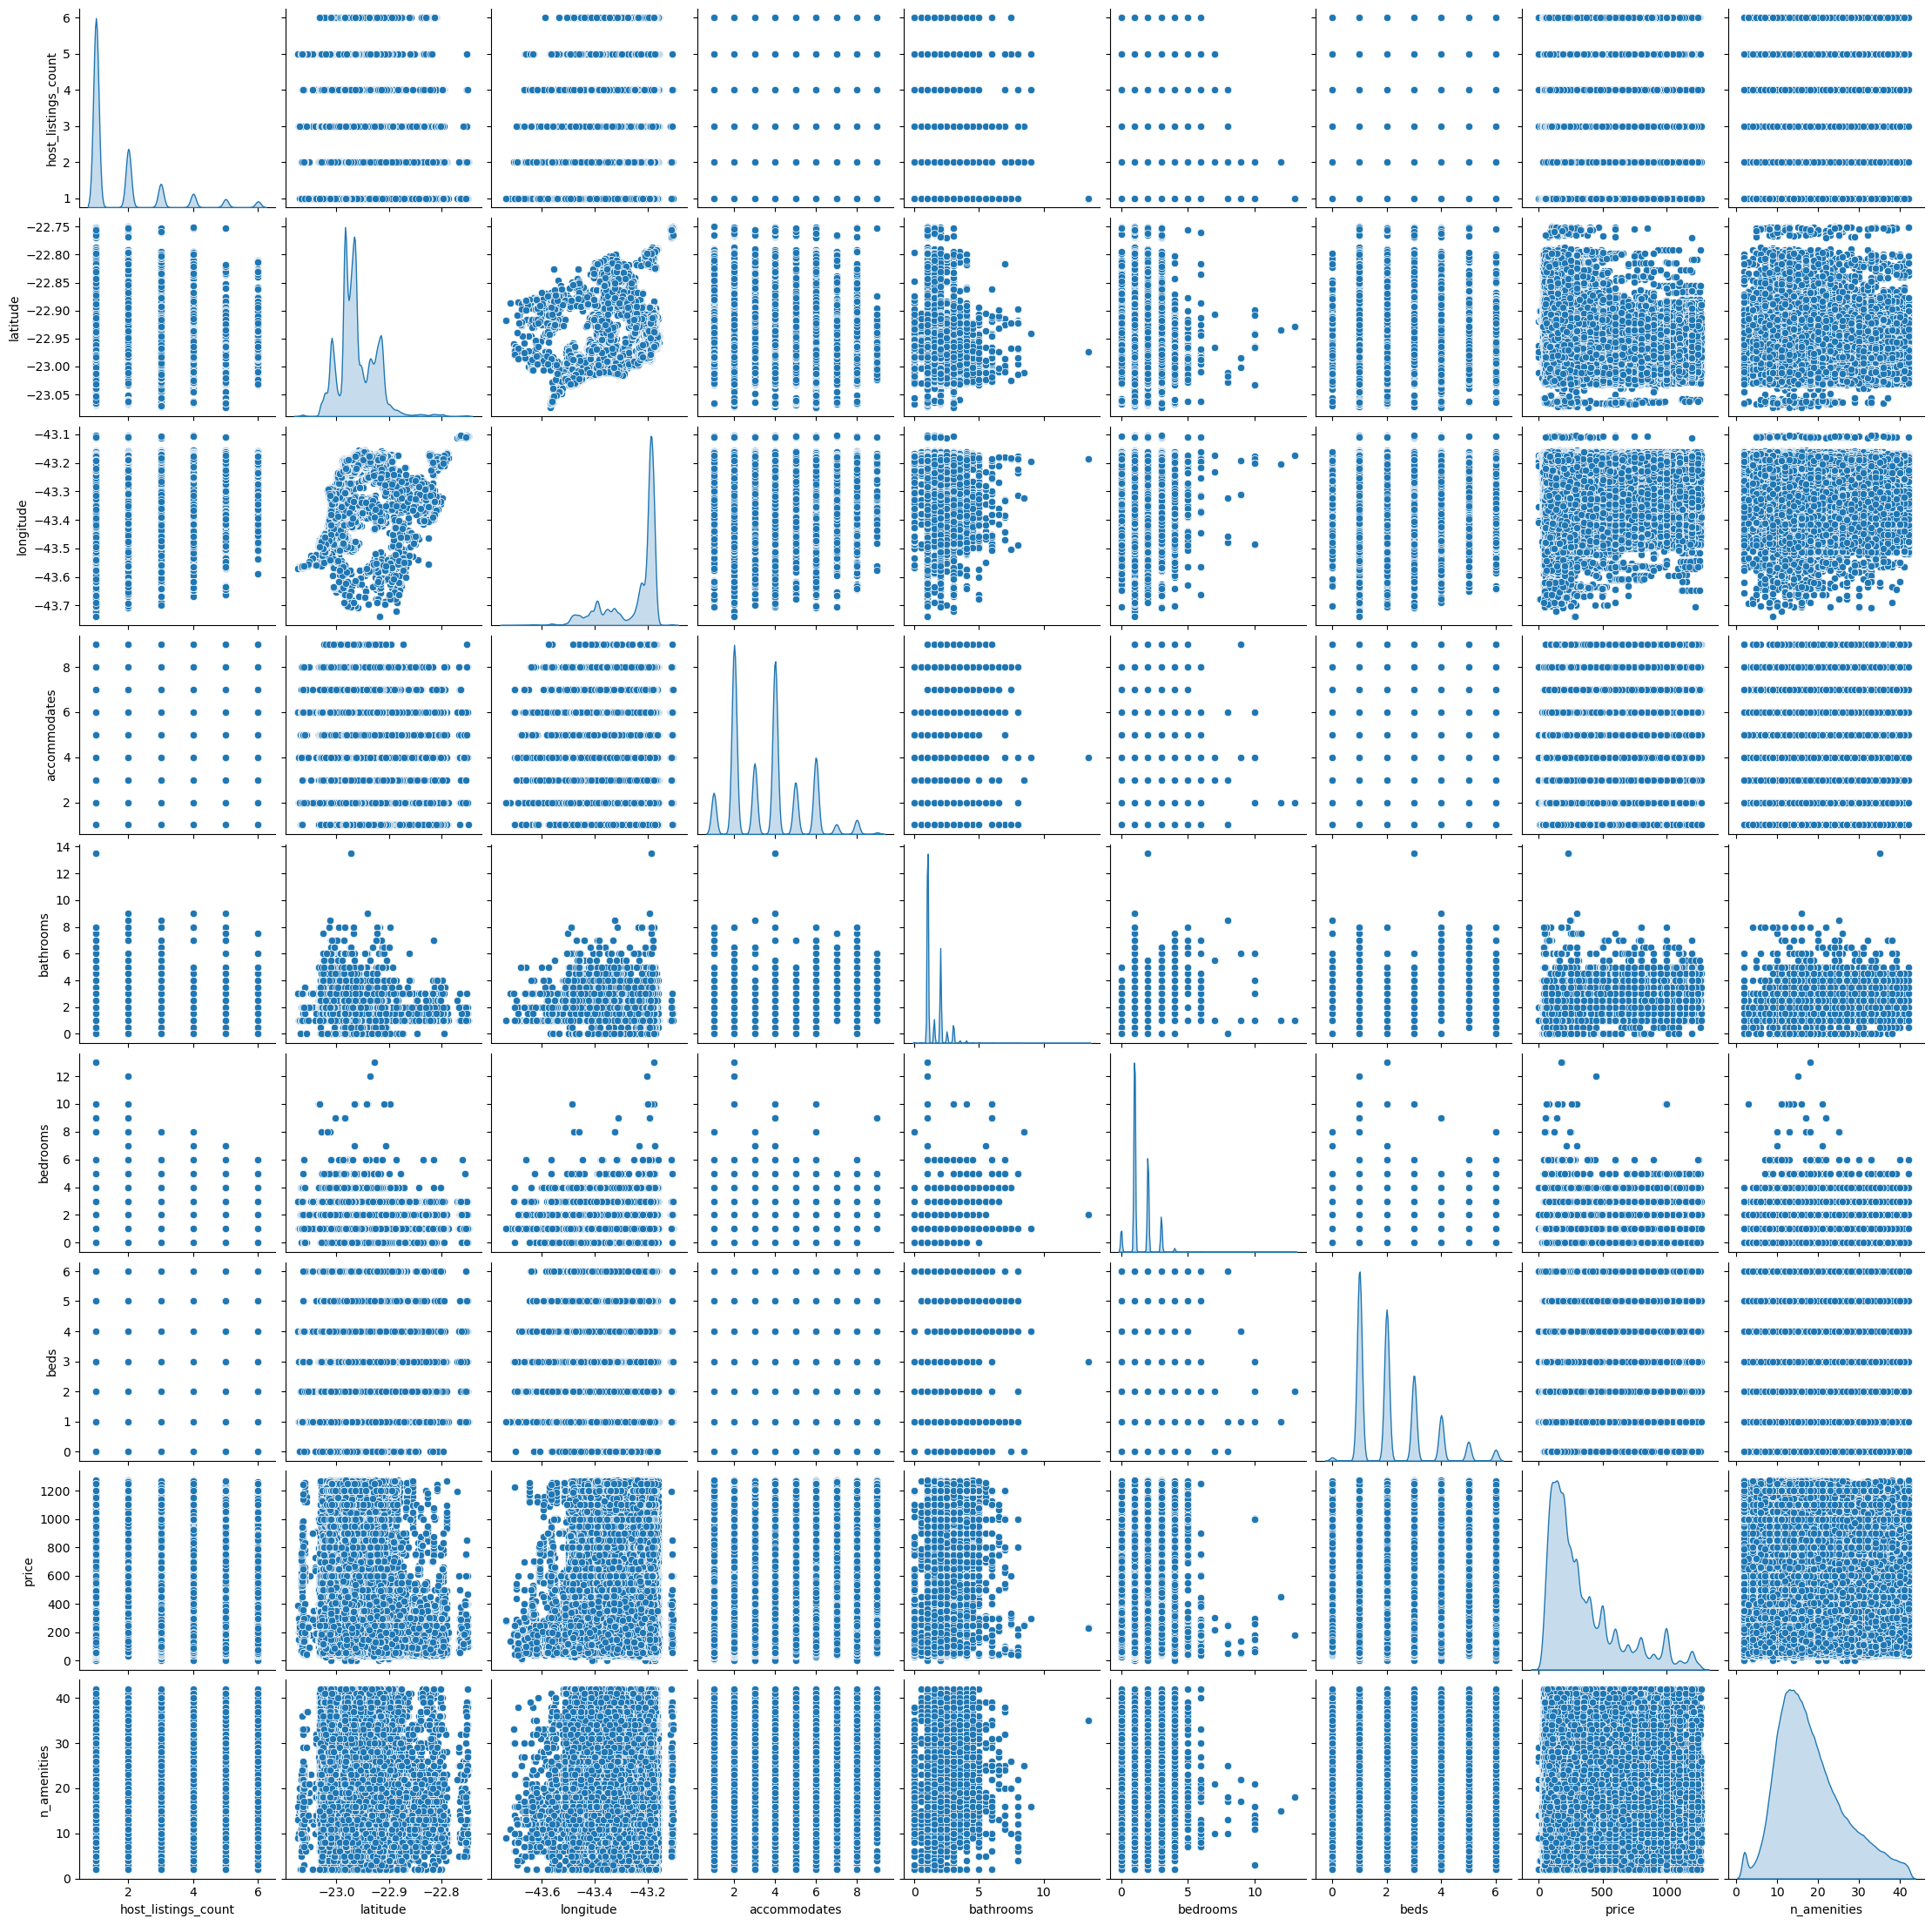

In [179]:
# Plot pairplot with normal distribution and correlation
sns.pairplot(df, diag_kind='kde')
plt.show()

* As we can notice, nothing fancy here, distribution looks ok and not much collinearity on those scatter plots as well.

In [180]:
df.select_dtypes(include =['object'])

host_is_superhost       property_type  \
0                      f         Condominium   
1                      f           Apartment   
2                      f           Apartment   
3                      t           Apartment   
4                      f           Apartment   
...                  ...                 ...   
784115                 f  Serviced apartment   
784116                 f         other_types   
784117                 f           Apartment   
784118                 f           Apartment   
784119                 f         Condominium   

                                                amenities  \
0       {TV,"Cable TV",Internet,Wifi,"Air conditioning...   
1       {TV,"Cable TV",Wifi,"Air conditioning","First ...   
2       {TV,"Cable TV",Internet,Wifi,"Air conditioning...   
3       {TV,"Cable TV",Internet,Wifi,"Air conditioning...   
4       {TV,"Cable TV",Internet,Wifi,"Air conditioning...   
...                                                   ...   
784115  {TV,Wifi,"Air conditioning","Free parking on p...   
784116  {Wifi,Pool,Kitchen,"Paid parking off premises"...   
784117  {Wifi,Kitchen,"Smoke detector","First aid kit"...   
784118  {TV,Wifi,"Air conditioning",Kitchen,Elevator,E...   
784119  {Wifi,Kitchen,Elevator,Washer,Essentials,Iron,...   

       require_guest_profile_picture require_guest_phone_verification  
0                                  f                                f  
1                                  f                                f  
2                                  t                                t  
3                                  f                                f  
4                                  t                                t  
...                              ...                              ...  
784115                             f                                f  
784116                             f                                f  
784117                             f                                f  
784118                             f                                f  
784119                             f                                f  

[576321 rows x 5 columns]

In [181]:
object_cols = ['host_is_superhost',
               'require_guest_profile_picture',
               'require_guest_phone_verification']

In [182]:
#encode above object columns

df_label_encoder = df.copy()


#convert t and f value to 1 and 0, t being 1.
for column in object_cols:
    df_label_encoder.loc[df_label_encoder[column] == 'f', column] = 0
    df_label_encoder.loc[df_label_encoder[column] == 't', column] = 1
    df_label_encoder[column] = df_label_encoder[column].astype(int)


In [183]:
encoder = LabelEncoder()

df_label_encoder['property_type'] = encoder.fit_transform(df_label_encoder['property_type']) 
df_label_encoder

host_is_superhost  host_listings_count   latitude  longitude  \
0                       0                    2 -22.965919 -43.178962   
1                       0                    1 -22.985698 -43.201935   
2                       0                    3 -22.977117 -43.190454   
3                       1                    1 -22.983024 -43.214270   
4                       0                    1 -22.988165 -43.193588   
...                   ...                  ...        ...        ...   
784115                  0                    2 -23.010880 -43.382670   
784116                  0                    2 -23.062040 -43.561130   
784117                  0                    1 -22.982870 -43.220140   
784118                  0                    2 -22.977930 -43.189500   
784119                  0                    1 -22.925610 -43.361750   

        property_type  accommodates  bathrooms  bedrooms  beds  \
0                   2             5        1.0       2.0   2.0   
1                   0             2        1.0       1.0   1.0   
2                   0             3        1.0       1.0   2.0   
3                   0             3        1.0       1.0   2.0   
4                   0             3        1.5       1.0   2.0   
...               ...           ...        ...       ...   ...   
784115              9             4        1.0       1.0   2.0   
784116             12             2        2.0       1.0   0.0   
784117              0             1        1.0       1.0   1.0   
784118              0             6        2.5       3.0   3.0   
784119              2             2        1.0       1.0   1.0   

                                                amenities  price  \
0       {TV,"Cable TV",Internet,Wifi,"Air conditioning...    307   
1       {TV,"Cable TV",Wifi,"Air conditioning","First ...    233   
2       {TV,"Cable TV",Internet,Wifi,"Air conditioning...    159   
3       {TV,"Cable TV",Internet,Wifi,"Air conditioning...    253   
4       {TV,"Cable TV",Internet,Wifi,"Air conditioning...    350   
...                                                   ...    ...   
784115  {TV,Wifi,"Air conditioning","Free parking on p...    335   
784116  {Wifi,Pool,Kitchen,"Paid parking off premises"...    140   
784117  {Wifi,Kitchen,"Smoke detector","First aid kit"...     55   
784118  {TV,Wifi,"Air conditioning",Kitchen,Elevator,E...    653   
784119  {Wifi,Kitchen,Elevator,Washer,Essentials,Iron,...    132   

        require_guest_profile_picture  require_guest_phone_verification  \
0                                   0                                 0   
1                                   0                                 0   
2                                   1                                 1   
3                                   0                                 0   
4                                   1                                 1   
...                               ...                               ...   
784115                              0                                 0   
784116                              0                                 0   
784117                              0                                 0   
784118                              0                                 0   
784119                              0                                 0   

        n_amenities  
0                26  
1                21  
2                15  
3                18  
4                32  
...             ...  
784115           11  
784116           17  
784117            8  
784118           13  
784119            8  

[576321 rows x 14 columns]

In [184]:
df_label_encoder.drop(columns = ['amenities'], axis = 1, inplace = True)

In [185]:
df_label_encoder

host_is_superhost  host_listings_count   latitude  longitude  \
0                       0                    2 -22.965919 -43.178962   
1                       0                    1 -22.985698 -43.201935   
2                       0                    3 -22.977117 -43.190454   
3                       1                    1 -22.983024 -43.214270   
4                       0                    1 -22.988165 -43.193588   
...                   ...                  ...        ...        ...   
784115                  0                    2 -23.010880 -43.382670   
784116                  0                    2 -23.062040 -43.561130   
784117                  0                    1 -22.982870 -43.220140   
784118                  0                    2 -22.977930 -43.189500   
784119                  0                    1 -22.925610 -43.361750   

        property_type  accommodates  bathrooms  bedrooms  beds  price  \
0                   2             5        1.0       2.0   2.0    307   
1                   0             2        1.0       1.0   1.0    233   
2                   0             3        1.0       1.0   2.0    159   
3                   0             3        1.0       1.0   2.0    253   
4                   0             3        1.5       1.0   2.0    350   
...               ...           ...        ...       ...   ...    ...   
784115              9             4        1.0       1.0   2.0    335   
784116             12             2        2.0       1.0   0.0    140   
784117              0             1        1.0       1.0   1.0     55   
784118              0             6        2.5       3.0   3.0    653   
784119              2             2        1.0       1.0   1.0    132   

        require_guest_profile_picture  require_guest_phone_verification  \
0                                   0                                 0   
1                                   0                                 0   
2                                   1                                 1   
3                                   0                                 0   
4                                   1                                 1   
...                               ...                               ...   
784115                              0                                 0   
784116                              0                                 0   
784117                              0                                 0   
784118                              0                                 0   
784119                              0                                 0   

        n_amenities  
0                26  
1                21  
2                15  
3                18  
4                32  
...             ...  
784115           11  
784116           17  
784117            8  
784118           13  
784119            8  

[576321 rows x 13 columns]

In [186]:
#split data into features and target variable
y = df_label_encoder['price']
X = df_label_encoder.drop(columns = ['price'], axis=1)

#boxcox transformation for positively skewed target variable
#y = boxcox(y+0.01)[0]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [187]:
#using Standard scaler to fit and transform X_train and transform X_test with training set metric values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [188]:
#models scores
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(evaluate(name, y_test, predictions))

model: Random Forest
Mean Absolute Error: 17.31033310158411
Root Mean Square Error: 50.807897376077676
R² Score: 96.8% 
--------------------------------------------
model: Lasso
Mean Absolute Error: 178.40672670255034
Root Mean Square Error: 238.39733379515863
R² Score: 29.44% 
--------------------------------------------
model: ElasticNet
Mean Absolute Error: 181.6457487629361
Root Mean Square Error: 240.931344861526
R² Score: 27.94% 
--------------------------------------------
model: XGBRegressor
Mean Absolute Error: 145.59702469529864
Root Mean Square Error: 200.35811094797137
R² Score: 50.16% 
--------------------------------------------
model: Linear Regression
Mean Absolute Error: 178.3906456978086
Root Mean Square Error: 238.3707278560534
R² Score: 29.46% 
--------------------------------------------
model: Linear SVR
Mean Absolute Error: 169.29012310320581
Root Mean Square Error: 248.4138937169389
R² Score: 23.39% 
--------------------------------------------
model: sgdregress

### Insight

* The Extra Tree Regressor performed significantly better in explaining the variability in the data.
* Compared to the previous dataset, this dataset appears to be more stable, and consequently, the model results are considerably improved.

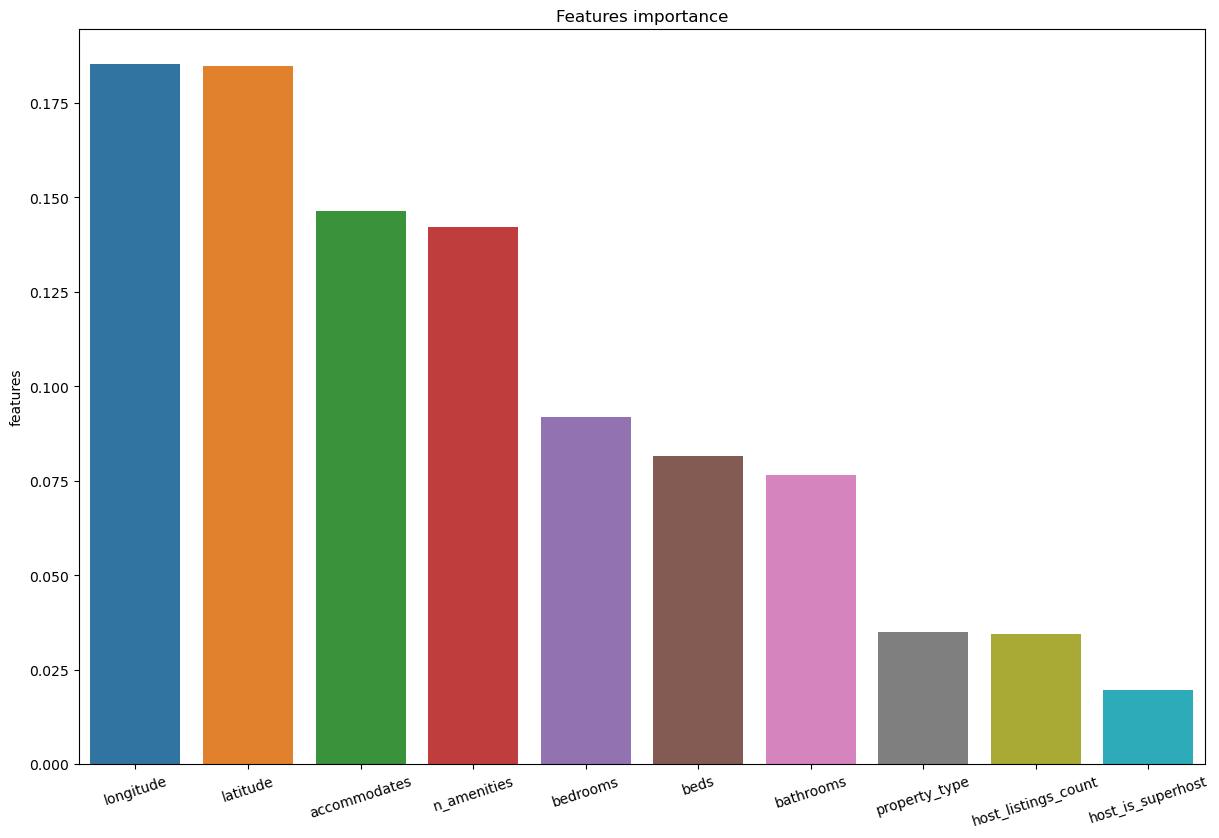

In [189]:
#plot feature importance

fig, ax = plt.subplots(figsize = (12,8))
X_test_df = pd.DataFrame(X_test, columns = X.columns)
barplot_df = pd.DataFrame({'features': model.feature_importances_}, index=X_test_df.columns)
barplot_df = barplot_df.sort_values(by='features', ascending=False)
barplot_df = barplot_df.iloc[:10]
ax.tick_params(axis='x', rotation=18)
plt.tight_layout()  # Adjust layout to prevent overlapping
ax.set_title('Features importance')
sns.barplot(x=barplot_df.index, y='features', data=barplot_df, ax = ax);

## conclusion
### After conducting the regression analysis, we can draw the following conclusions:

* Location variables such as latitude and longitude have the most significant impact on the property price.
* This is followed by the number of people the property accommodates, indicating the property's capacity.
* The number of amenities also plays a notable role, suggesting the property's overall quality and condition.
* Notably, these findings closely resemble those observed in the previous dataset.